In [1]:
import numpy as np
import re
import pandas as pd
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from prac_task2 import optimization
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42

### Задание 1

In [2]:
data_train = pd.read_csv('data_toxic/toxic_train.csv', index_col=0)
data_test = pd.read_csv('data_toxic/toxic_test.csv', index_col=0)

In [3]:
data_train

,comment_text,is_toxic
0,Explanation\nWhy the edits made under my usern...,False
1,D'aww! He matches this background colour I'm s...,False
2,"Hey man, I'm really not trying to edit war. It...",False
3,"""\nMore\nI can't make any real suggestions on ...",False
4,"You, sir, are my hero. Any chance you remember...",False
...,...,...
159494,"""\n\n our previous conversation \n\nyou fuckin...",True
159514,YOU ARE A MISCHIEVIOUS PUBIC HAIR,True
159541,Your absurd edits \n\nYour absurd edits on gre...,True
159546,"""\n\nHey listen don't you ever!!!! Delete my e...",True


In [4]:
data_test

,comment_text,is_toxic
0,Thank you for understanding. I think very high...,False
1,:Dear god this site is horrible.,False
2,"""::: Somebody will invariably try to add Relig...",False
3,""" \n\n It says it right there that it IS a typ...",False
4,""" \n\n == Before adding a new product to the l...",False
...,...,...
63877,NIGEL IS A CRAZY IDIOT!!!,True
63935,""" \n ::Well, now don't I feel stupid.... · """,True
63945,==Fourth Baldrick possibly being cleverer than...,True
63962,""" \n\n == IRAN == \n That’s right, Iran. It wa...",True


In [5]:
data_train.is_toxic = data_train.is_toxic.astype(np.int32)
data_test.is_toxic = data_test.is_toxic.astype(np.int32)

In [6]:
data_train.comment_text = np.array(list(map(lambda z: z.lower(), data_train.comment_text)))
data_test.comment_text = np.array(list(map(lambda z: z.lower(), data_test.comment_text)))

In [7]:
data_train.comment_text = np.array(list(map(lambda z: re.sub('[^a-z0-9 ]', ' ', z, count=0), data_train.comment_text)))
data_test.comment_text = np.array(list(map(lambda z: re.sub('[^a-z0-9 ]', ' ', z, count=0), data_test.comment_text)))

In [8]:
data_train

,comment_text,is_toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i m s...,0
2,hey man i m really not trying to edit war it...,0
3,more i can t make any real suggestions on im...,0
4,you sir are my hero any chance you remember...,0
...,...,...
159494,our previous conversation you fucking sh...,1
159514,you are a mischievious pubic hair,1
159541,your absurd edits your absurd edits on great...,1
159546,hey listen don t you ever delete my edi...,1


### Задание 2

In [9]:
y_train = data_train.is_toxic.to_numpy()
y_test = data_test.is_toxic.to_numpy()

In [10]:
bow = CountVectorizer(max_df=1.0, min_df=5, dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())

In [11]:
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [12]:
X_train.shape

(52061, 18254)

### Задание 3

In [13]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)

In [14]:
X_train_fit.shape

(41648, 18254)

In [15]:
w_0 = np.zeros(X_train_fit.shape[1], dtype=np.float64)
alpha = [0.001, 0.01, 0.1, 0.5]
his_alpha = []

In [16]:
for alpha_value in alpha:
    gd = optimization.GDClassifier(step_alpha=alpha_value, step_beta=0, tolerance=1e-5, max_iter=1000, l2_coef=1.0)
    his_alpha.append(gd.fit(X_train_fit, y_train_fit, w_0, trace=True, acc=(X_train_val, y_train_val)))

Warning!!! Convergence not achieved!


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


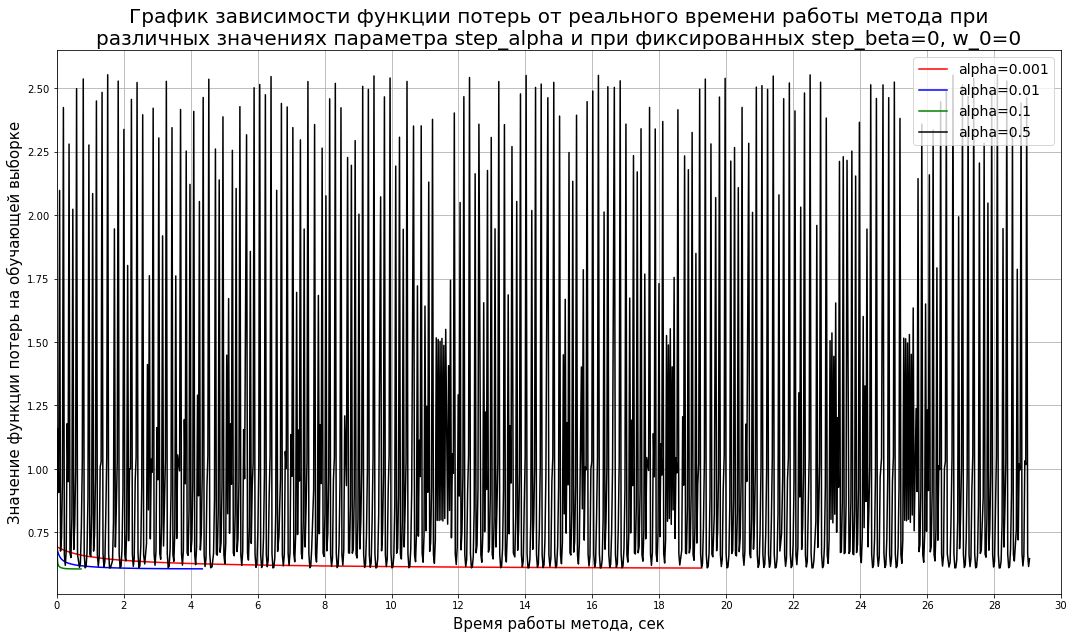

In [17]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_alpha[0]['time'])), his_alpha[0]['func'], color='red', label='alpha=0.001')
plt.plot(np.cumsum(np.array(his_alpha[1]['time'])), his_alpha[1]['func'], color='blue', label='alpha=0.01')
plt.plot(np.cumsum(np.array(his_alpha[2]['time'])), his_alpha[2]['func'], color='green', label='alpha=0.1')
plt.plot(np.cumsum(np.array(his_alpha[3]['time'])), his_alpha[3]['func'], color='black', label='alpha=0.5')
plt.title('График зависимости функции потерь от реального времени работы метода при\nразличных значениях параметра step_alpha и при фиксированных step_beta=0, w_0=0', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xticks(np.arange(0, 31, 2))
plt.xlim([0, 30])
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig1.pdf', format='pdf', dpi=600)

Значение параметра step_alpha=0.5 больше рассматривать не будем, при нем метод градиентного спуска не сходится.

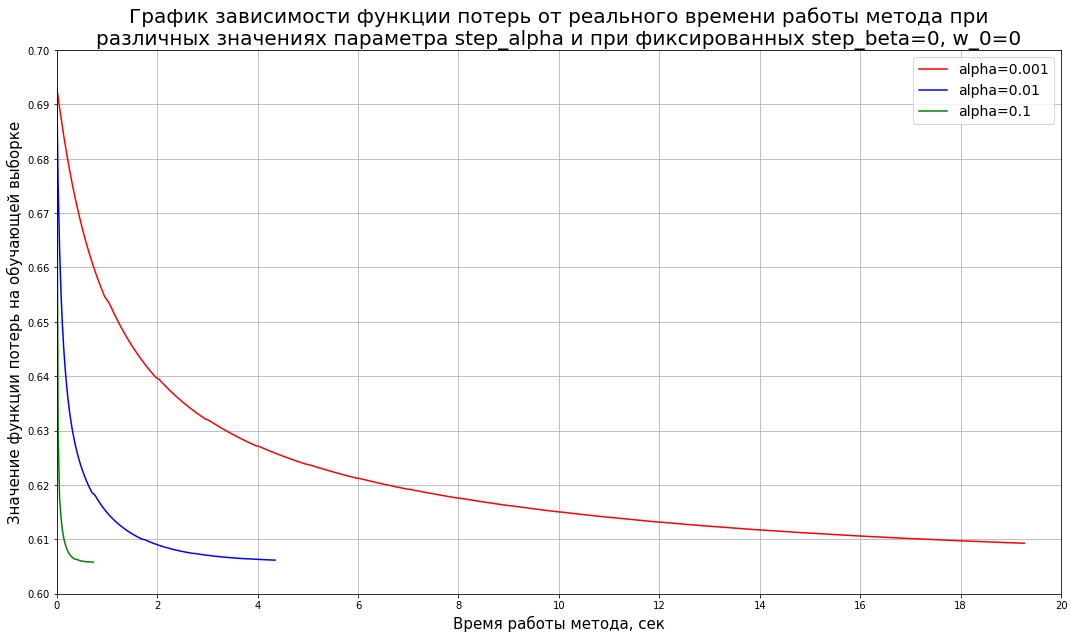

In [18]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_alpha[0]['time'])), his_alpha[0]['func'], color='red', label='alpha=0.001')
plt.plot(np.cumsum(np.array(his_alpha[1]['time'])), his_alpha[1]['func'], color='blue', label='alpha=0.01')
plt.plot(np.cumsum(np.array(his_alpha[2]['time'])), his_alpha[2]['func'], color='green', label='alpha=0.1')
plt.title('График зависимости функции потерь от реального времени работы метода при\nразличных значениях параметра step_alpha и при фиксированных step_beta=0, w_0=0', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0.6, 0.71, 0.01))
plt.xlim([0, 20])
plt.ylim([0.6, 0.7])
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig2.pdf', format='pdf', dpi=600)

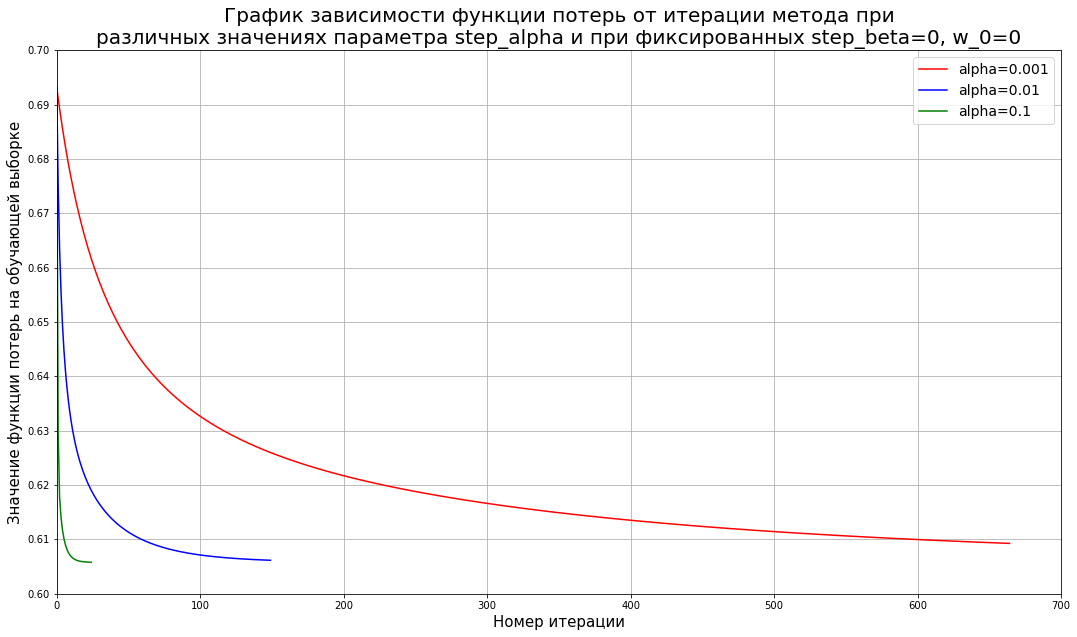

In [19]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_alpha[0]['func'])), his_alpha[0]['func'], color='red', label='alpha=0.001')
plt.plot(np.arange(len(his_alpha[1]['func'])), his_alpha[1]['func'], color='blue', label='alpha=0.01')
plt.plot(np.arange(len(his_alpha[2]['func'])), his_alpha[2]['func'], color='green', label='alpha=0.1')
plt.title('График зависимости функции потерь от итерации метода при\nразличных значениях параметра step_alpha и при фиксированных step_beta=0, w_0=0', fontsize=20)
plt.xlabel('Номер итерации', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 700])
plt.xticks(np.arange(0, 800, 100))
plt.yticks(np.arange(0.6, 0.71, 0.01))
plt.ylim([0.6, 0.7])
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()

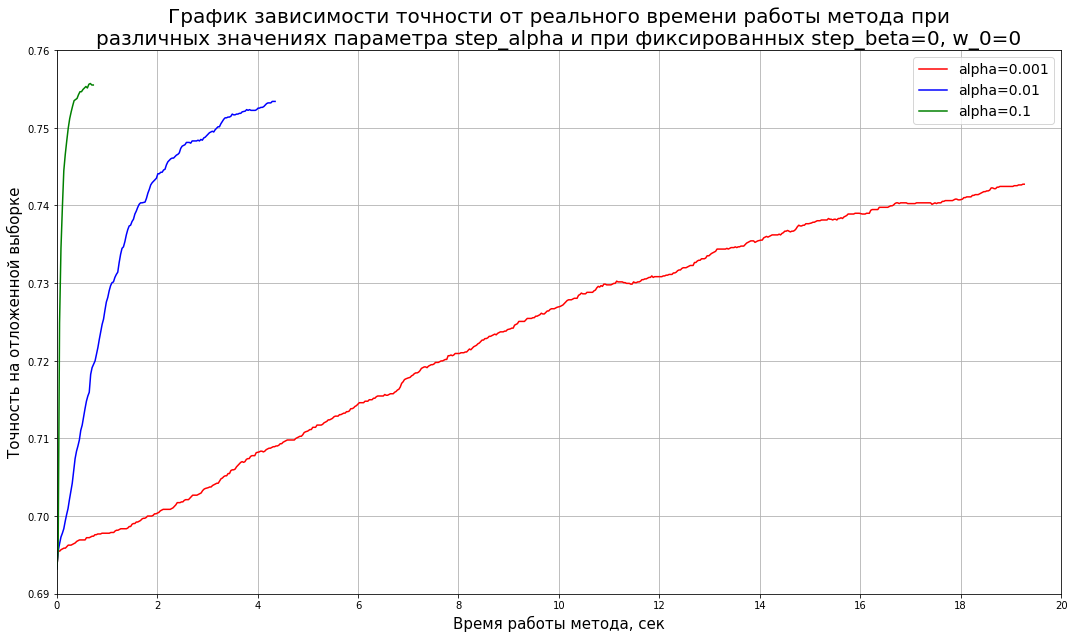

In [19]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_alpha[0]['time'])), his_alpha[0]['acc'], color='red', label='alpha=0.001')
plt.plot(np.cumsum(np.array(his_alpha[1]['time'])), his_alpha[1]['acc'], color='blue', label='alpha=0.01')
plt.plot(np.cumsum(np.array(his_alpha[2]['time'])), his_alpha[2]['acc'], color='green', label='alpha=0.1')
plt.title('График зависимости точности от реального времени работы метода при\nразличных значениях параметра step_alpha и при фиксированных step_beta=0, w_0=0', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 20])
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0.69, 0.76, 0.01))
plt.ylim([0.69, 0.76])
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig3.pdf', format='pdf', dpi=600)

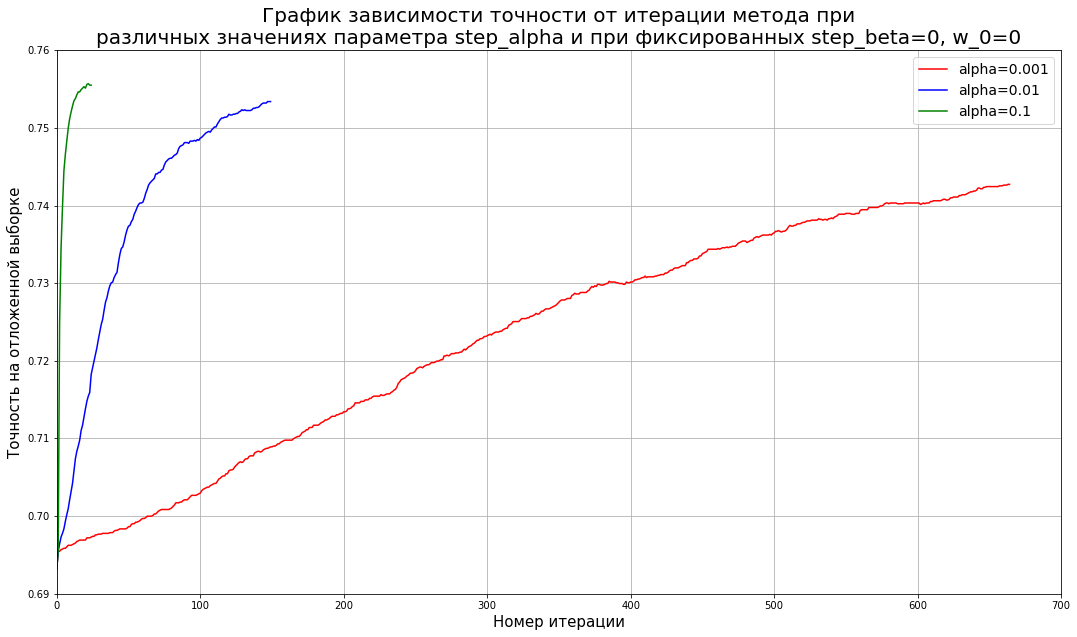

In [21]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_alpha[0]['func'])), his_alpha[0]['acc'], color='red', label='alpha=0.001')
plt.plot(np.arange(len(his_alpha[1]['func'])), his_alpha[1]['acc'], color='blue', label='alpha=0.01')
plt.plot(np.arange(len(his_alpha[2]['func'])), his_alpha[2]['acc'], color='green', label='alpha=0.1')
plt.title('График зависимости точности от итерации метода при\nразличных значениях параметра step_alpha и при фиксированных step_beta=0, w_0=0', fontsize=20)
plt.xlabel('Номер итерации', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 700])
plt.xticks(np.arange(0, 800, 100))
plt.yticks(np.arange(0.69, 0.76, 0.01))
plt.ylim([0.69, 0.76])
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()

In [20]:
w_0 = np.zeros(X_train_fit.shape[1], dtype=np.float64)
beta = [0.0, 0.1, 0.5, 1.0, 2.0]
his_beta = []

In [21]:
for beta_value in beta:
    gd = optimization.GDClassifier(step_alpha=0.01, step_beta=beta_value, tolerance=1e-5, max_iter=1000, l2_coef=1.0)
    his_beta.append(gd.fit(X_train_fit, y_train_fit, w_0, trace=True, acc=(X_train_val, y_train_val)))

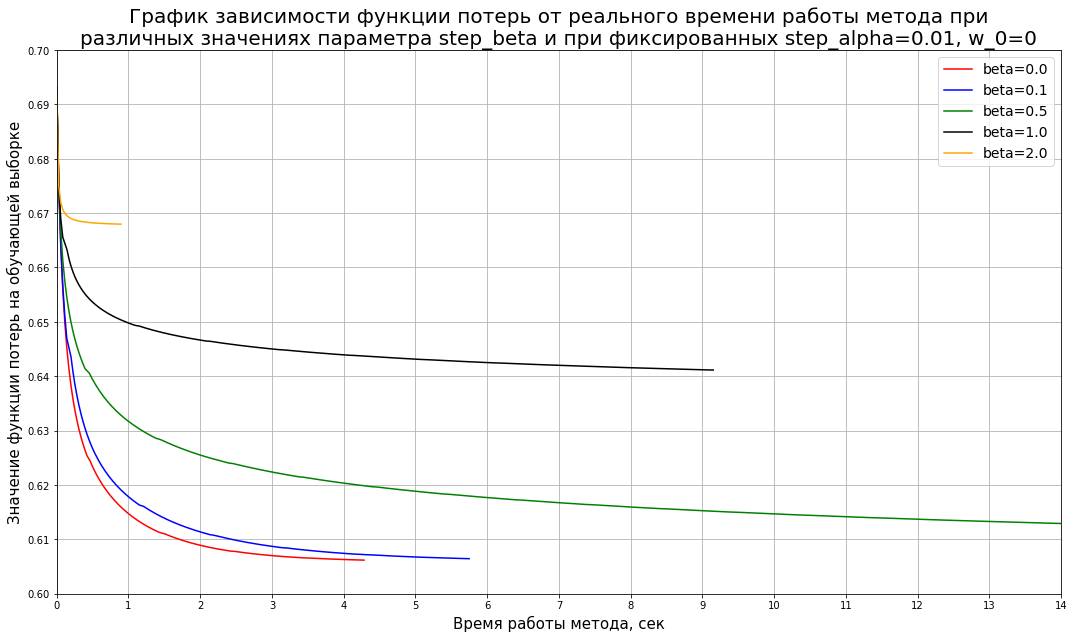

In [22]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_beta[0]['time'])), his_beta[0]['func'], color='red', label='beta=0.0')
plt.plot(np.cumsum(np.array(his_beta[1]['time'])), his_beta[1]['func'], color='blue', label='beta=0.1')
plt.plot(np.cumsum(np.array(his_beta[2]['time'])), his_beta[2]['func'], color='green', label='beta=0.5')
plt.plot(np.cumsum(np.array(his_beta[3]['time'])), his_beta[3]['func'], color='black', label='beta=1.0')
plt.plot(np.cumsum(np.array(his_beta[4]['time'])), his_beta[4]['func'], color='orange', label='beta=2.0')
plt.title('График зависимости функции потерь от реального времени работы метода при\nразличных значениях параметра step_beta и при фиксированных step_alpha=0.01, w_0=0', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 14])
plt.xticks(np.arange(0, 15, 1))
plt.yticks(np.arange(0.6, 0.71, 0.01))
plt.ylim([0.6, 0.7])
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig4.pdf', format='pdf', dpi=600)

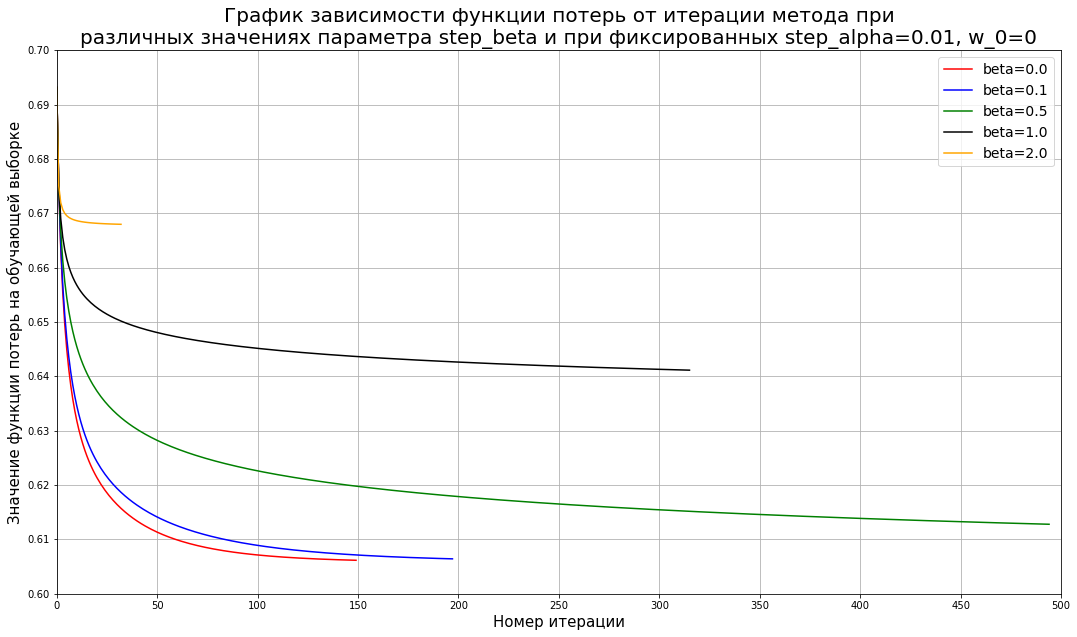

In [25]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_beta[0]['func'])), his_beta[0]['func'], color='red', label='beta=0.0')
plt.plot(np.arange(len(his_beta[1]['func'])), his_beta[1]['func'], color='blue', label='beta=0.1')
plt.plot(np.arange(len(his_beta[2]['func'])), his_beta[2]['func'], color='green', label='beta=0.5')
plt.plot(np.arange(len(his_beta[3]['func'])), his_beta[3]['func'], color='black', label='beta=1.0')
plt.plot(np.arange(len(his_beta[4]['func'])), his_beta[4]['func'], color='orange', label='beta=2.0')
plt.title('График зависимости функции потерь от итерации метода при\nразличных значениях параметра step_beta и при фиксированных step_alpha=0.01, w_0=0', fontsize=20)
plt.xlabel('Номер итерации', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 500])
plt.xticks(np.arange(0, 501, 50))
plt.yticks(np.arange(0.6, 0.71, 0.01))
plt.ylim([0.6, 0.7])
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()

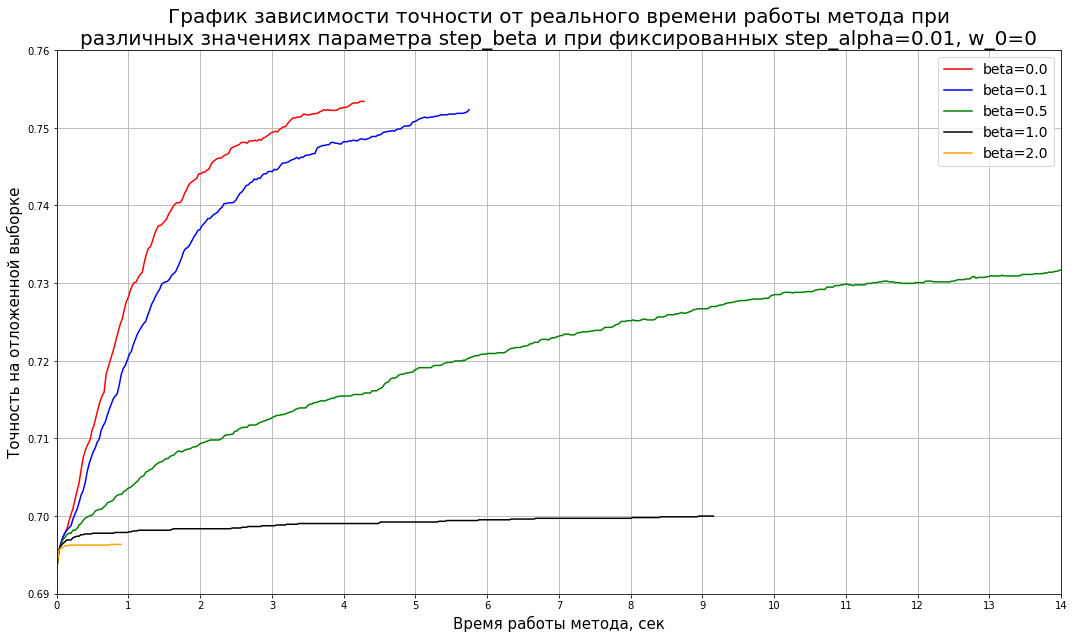

In [23]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_beta[0]['time'])), his_beta[0]['acc'], color='red', label='beta=0.0')
plt.plot(np.cumsum(np.array(his_beta[1]['time'])), his_beta[1]['acc'], color='blue', label='beta=0.1')
plt.plot(np.cumsum(np.array(his_beta[2]['time'])), his_beta[2]['acc'], color='green', label='beta=0.5')
plt.plot(np.cumsum(np.array(his_beta[3]['time'])), his_beta[3]['acc'], color='black', label='beta=1.0')
plt.plot(np.cumsum(np.array(his_beta[4]['time'])), his_beta[4]['acc'], color='orange', label='beta=2.0')
plt.title('График зависимости точности от реального времени работы метода при\nразличных значениях параметра step_beta и при фиксированных step_alpha=0.01, w_0=0', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 14])
plt.xticks(np.arange(0, 15, 1))
plt.yticks(np.arange(0.69, 0.76, 0.01))
plt.ylim([0.69, 0.76])
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig5.pdf', format='pdf', dpi=600)

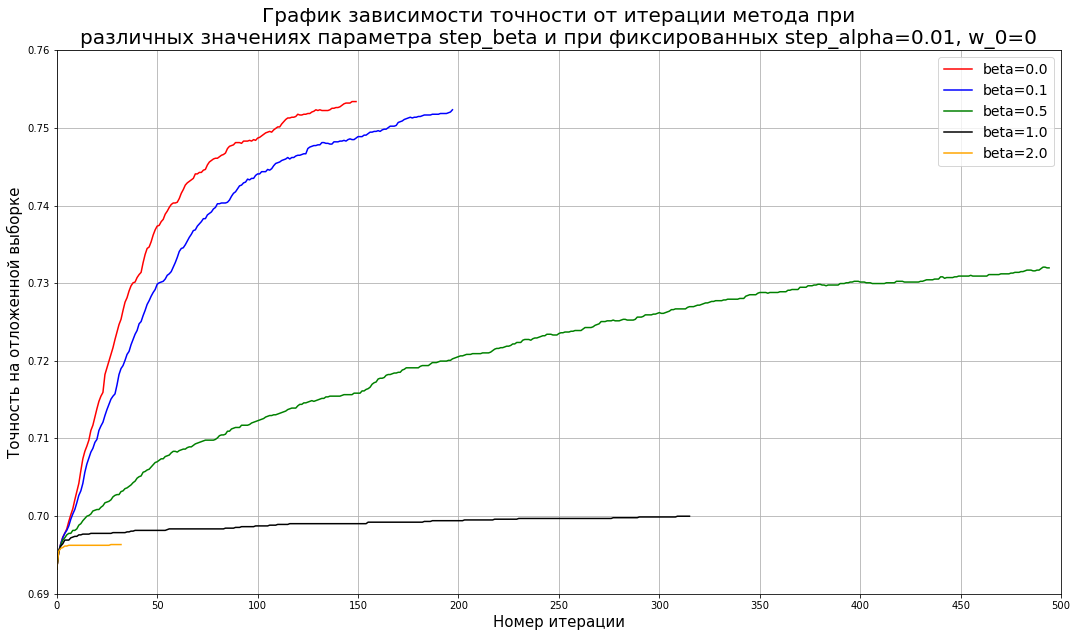

In [27]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_beta[0]['func'])), his_beta[0]['acc'], color='red', label='beta=0.0')
plt.plot(np.arange(len(his_beta[1]['func'])), his_beta[1]['acc'], color='blue', label='beta=0.1')
plt.plot(np.arange(len(his_beta[2]['func'])), his_beta[2]['acc'], color='green', label='beta=0.5')
plt.plot(np.arange(len(his_beta[3]['func'])), his_beta[3]['acc'], color='black', label='beta=1.0')
plt.plot(np.arange(len(his_beta[4]['func'])), his_beta[4]['acc'], color='orange', label='beta=2.0')
plt.title('График зависимости точности от итерации метода при\nразличных значениях параметра step_beta и при фиксированных step_alpha=0.01, w_0=0', fontsize=20)
plt.xlabel('Номер итерации', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 500])
plt.xticks(np.arange(0, 501, 50))
plt.yticks(np.arange(0.69, 0.76, 0.01))
plt.ylim([0.69, 0.76])
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()

In [24]:
w_0 = [np.zeros(X_train_fit.shape[1], dtype=np.float64), np.ones(X_train_fit.shape[1], dtype=np.float64), np.random.randn(X_train_fit.shape[1]), np.random.rand(X_train_fit.shape[1])]
his_w0 = []

In [25]:
for w0_value in w_0:
    gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=1000, l2_coef=1.0)
    his_w0.append(gd.fit(X_train_fit, y_train_fit, w0_value, trace=True, acc=(X_train_val, y_train_val)))

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

Warning!!! Convergence not achieved!
Warning!!! Convergence not achieved!


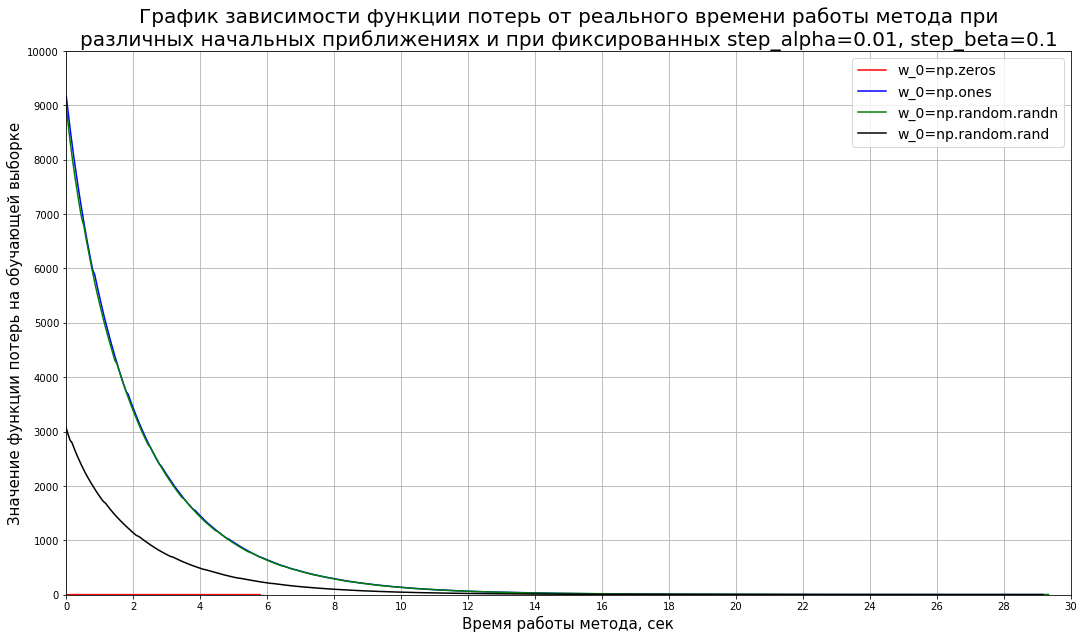

In [26]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_w0[0]['time'])), his_w0[0]['func'], color='red', label='w_0=np.zeros')
plt.plot(np.cumsum(np.array(his_w0[1]['time'])), his_w0[1]['func'], color='blue', label='w_0=np.ones')
plt.plot(np.cumsum(np.array(his_w0[2]['time'])), his_w0[2]['func'], color='green', label='w_0=np.random.randn')
plt.plot(np.cumsum(np.array(his_w0[3]['time'])), his_w0[3]['func'], color='black', label='w_0=np.random.rand')
plt.title('График зависимости функции потерь от реального времени работы метода при\nразличных начальных приближениях и при фиксированных step_alpha=0.01, step_beta=0.1', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 30])
plt.xticks(np.arange(0, 31, 2))
plt.ylim([0, 10000])
plt.yticks(np.arange(0, 10001, 1000))
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig6.pdf', format='pdf', dpi=600)

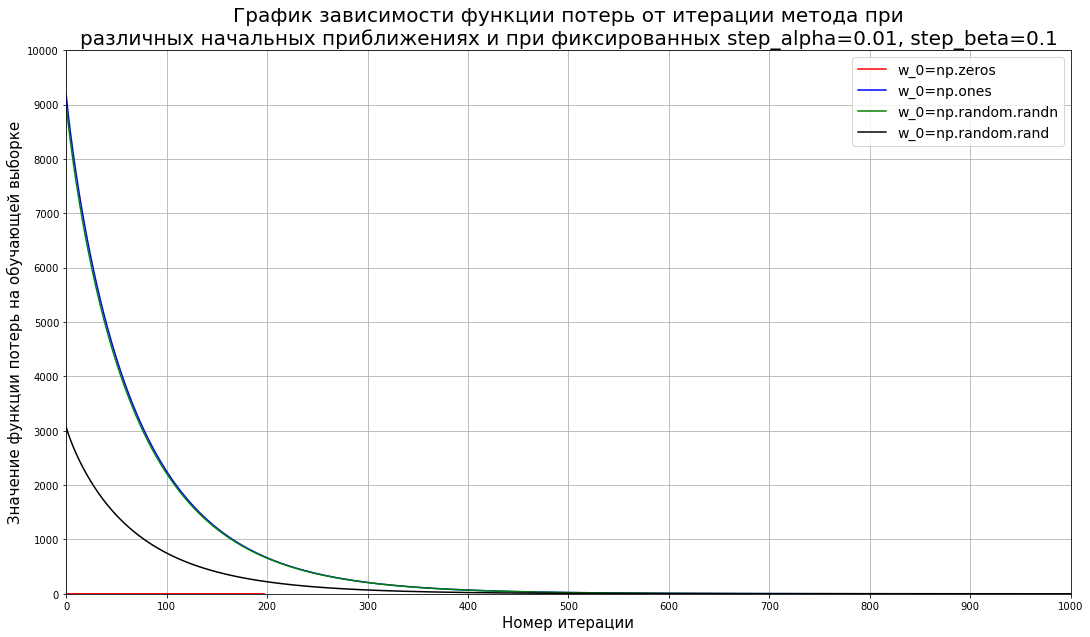

In [28]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_w0[0]['func'])), his_w0[0]['func'], color='red', label='w_0=np.zeros')
plt.plot(np.arange(len(his_w0[1]['func'])), his_w0[1]['func'], color='blue', label='w_0=np.ones')
plt.plot(np.arange(len(his_w0[2]['func'])), his_w0[2]['func'], color='green', label='w_0=np.random.randn')
plt.plot(np.arange(len(his_w0[3]['func'])), his_w0[3]['func'], color='black', label='w_0=np.random.rand')
plt.title('График зависимости функции потерь от итерации метода при\nразличных начальных приближениях и при фиксированных step_alpha=0.01, step_beta=0.1', fontsize=20)
plt.xlabel('Номер итерации', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.ylim([0, 10000])
plt.xlim([0, 1000])
plt.xticks(np.arange(0, 1001, 100))
plt.yticks(np.arange(0, 10001, 1000))
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()

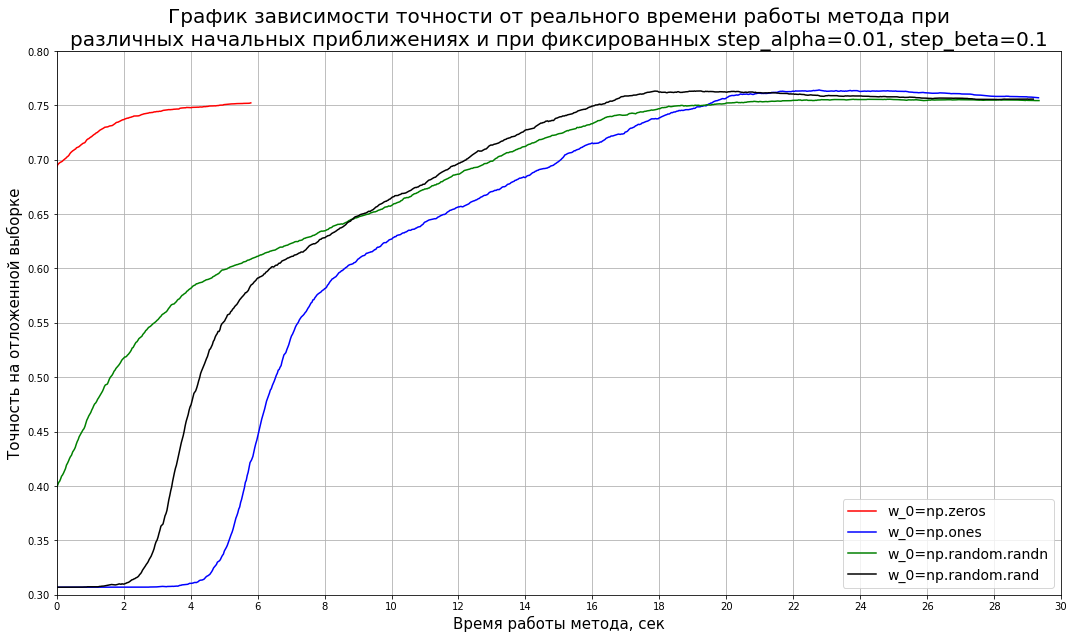

In [27]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_w0[0]['time'])), his_w0[0]['acc'], color='red', label='w_0=np.zeros')
plt.plot(np.cumsum(np.array(his_w0[1]['time'])), his_w0[1]['acc'], color='blue', label='w_0=np.ones')
plt.plot(np.cumsum(np.array(his_w0[2]['time'])), his_w0[2]['acc'], color='green', label='w_0=np.random.randn')
plt.plot(np.cumsum(np.array(his_w0[3]['time'])), his_w0[3]['acc'], color='black', label='w_0=np.random.rand')
plt.title('График зависимости точности от реального времени работы метода при\nразличных начальных приближениях и при фиксированных step_alpha=0.01, step_beta=0.1', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 30])
plt.xticks(np.arange(0, 31, 2))
plt.ylim([0.3, 0.8])
plt.yticks(np.arange(0.3, 0.85, 0.05))
plt.grid()
plt.legend(loc=4, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig7.pdf', format='pdf', dpi=600)

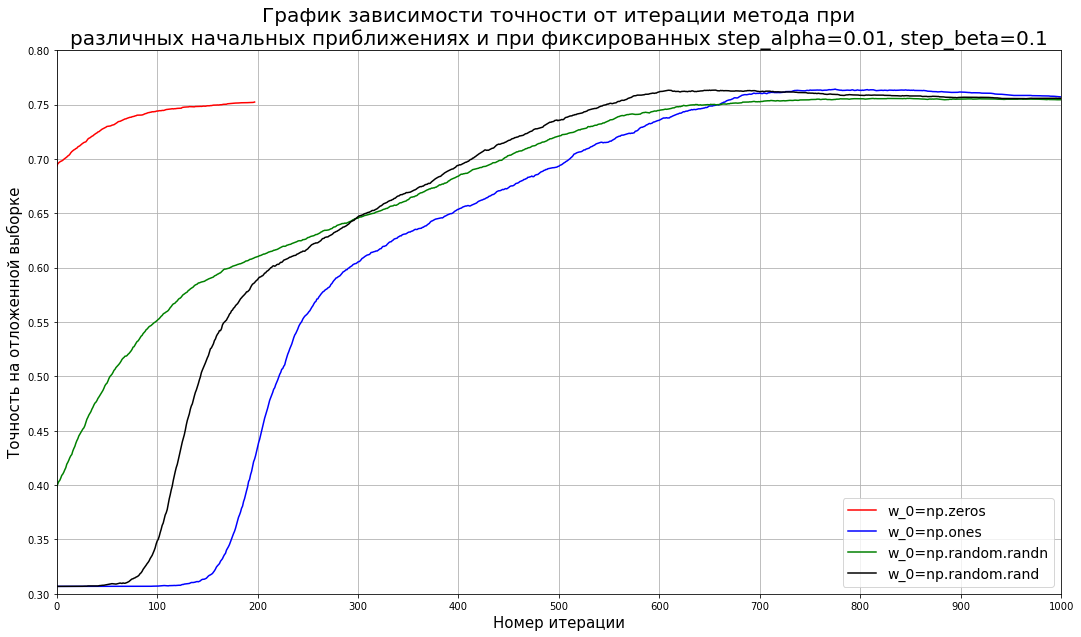

In [29]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_w0[0]['func'])), his_w0[0]['acc'], color='red', label='w_0=np.zeros')
plt.plot(np.arange(len(his_w0[1]['func'])), his_w0[1]['acc'], color='blue', label='w_0=np.ones')
plt.plot(np.arange(len(his_w0[2]['func'])), his_w0[2]['acc'], color='green', label='w_0=np.random.randn')
plt.plot(np.arange(len(his_w0[3]['func'])), his_w0[3]['acc'], color='black', label='w_0=np.random.rand')
plt.title('График зависимости точности от итерации метода при\nразличных начальных приближениях и при фиксированных step_alpha=0.01, step_beta=0.1', fontsize=20)
plt.xlabel('Номер итерации', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.ylim([0.3, 0.8])
plt.yticks(np.arange(0.3, 0.85, 0.05))
plt.xlim([0, 1000])
plt.xticks(np.arange(0, 1001, 100))
plt.grid()
plt.legend(loc=4, prop={'size': 14})
plt.show()

### Задание 4

In [30]:
w_0 = np.zeros(X_train_fit.shape[1], dtype=np.float64)
alpha = [0.001, 0.01, 0.1, 0.5]
his_alpha = []

In [31]:
for alpha_value in alpha:
    sgd = optimization.SGDClassifier(batch_size=100, step_alpha=alpha_value, step_beta=0, tolerance=1e-5, max_epoch=20, l2_coef=1.0)
    his_alpha.append(sgd.fit(X_train_fit, y_train_fit, w_0, trace=True, acc=(X_train_val, y_train_val)))

Warning!!! Convergence not achieved!
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
Warning!!! Convergence not achieved!


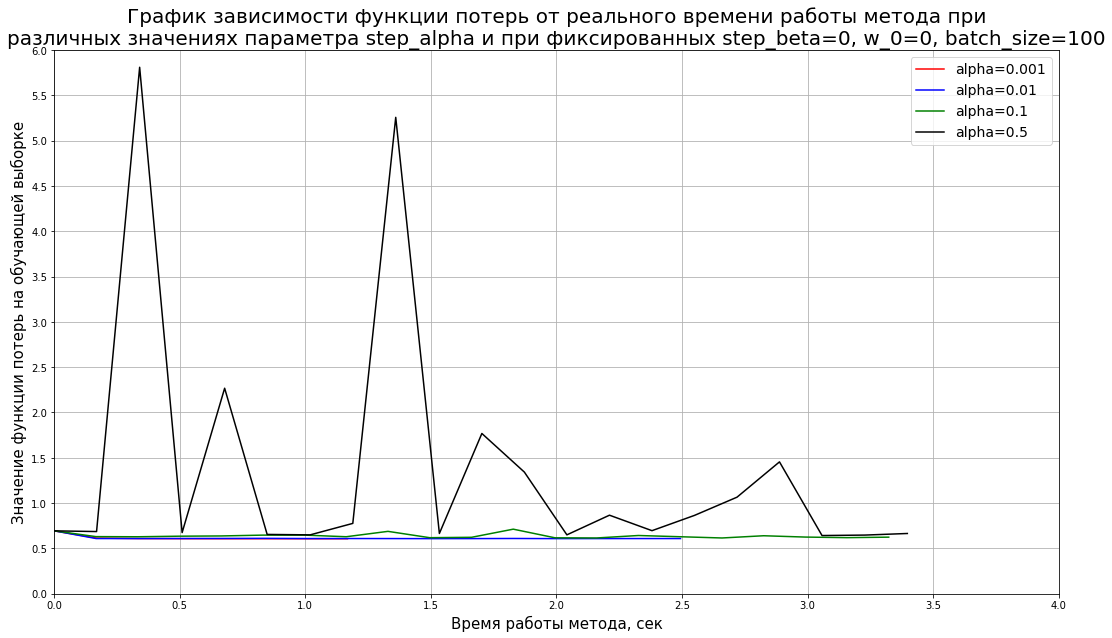

In [36]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_alpha[0]['time'])), his_alpha[0]['func'], color='red', label='alpha=0.001')
plt.plot(np.cumsum(np.array(his_alpha[1]['time'])), his_alpha[1]['func'], color='blue', label='alpha=0.01')
plt.plot(np.cumsum(np.array(his_alpha[2]['time'])), his_alpha[2]['func'], color='green', label='alpha=0.1')
plt.plot(np.cumsum(np.array(his_alpha[3]['time'])), his_alpha[3]['func'], color='black', label='alpha=0.5')
plt.title('График зависимости функции потерь от реального времени работы метода при\nразличных значениях параметра step_alpha и при фиксированных step_beta=0, w_0=0, batch_size=100', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 4])
plt.xticks(np.arange(0, 4.5, 0.5))
plt.ylim([0, 6])
plt.yticks(np.arange(0, 6.5, 0.5))
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()

Построим тот же график, но без step_alpha=0.5

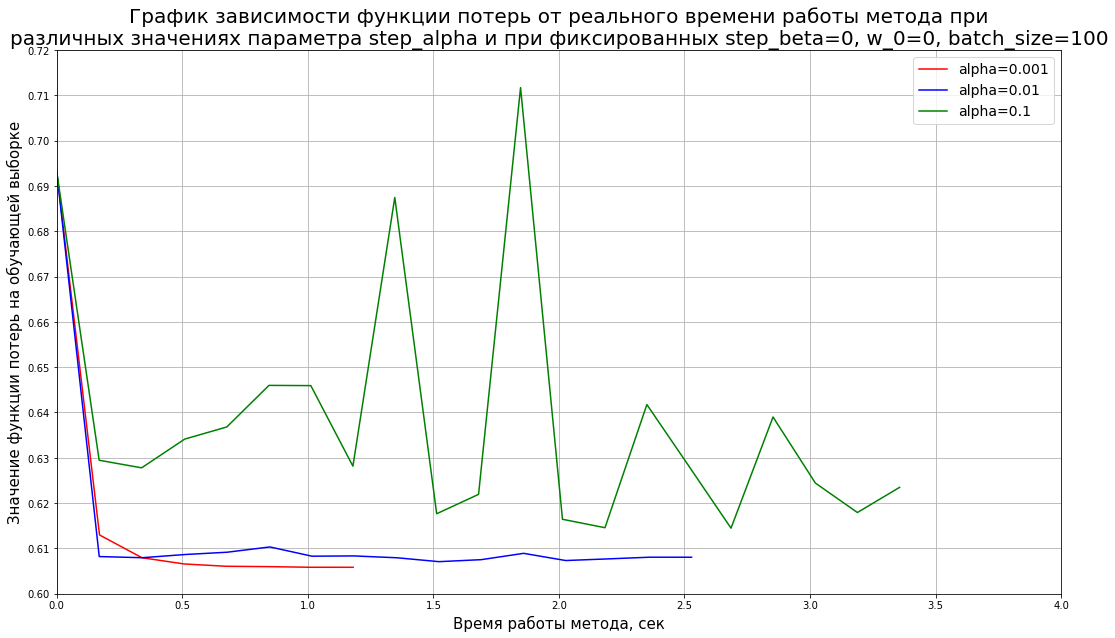

In [32]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_alpha[0]['time'])), his_alpha[0]['func'], color='red', label='alpha=0.001')
plt.plot(np.cumsum(np.array(his_alpha[1]['time'])), his_alpha[1]['func'], color='blue', label='alpha=0.01')
plt.plot(np.cumsum(np.array(his_alpha[2]['time'])), his_alpha[2]['func'], color='green', label='alpha=0.1')
plt.title('График зависимости функции потерь от реального времени работы метода при\nразличных значениях параметра step_alpha и при фиксированных step_beta=0, w_0=0, batch_size=100', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 4])
plt.xticks(np.arange(0, 4.5, 0.5))
plt.yticks(np.arange(0.6, 0.73, 0.01))
plt.ylim([0.6, 0.72])
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig8.pdf', format='pdf', dpi=600)

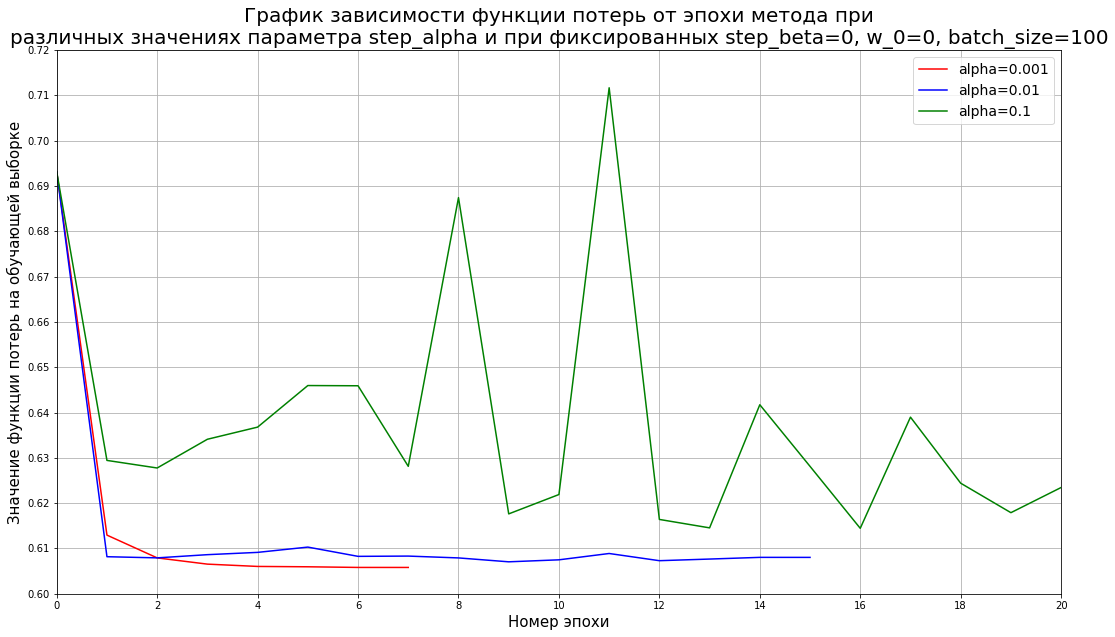

In [40]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_alpha[0]['func'])), his_alpha[0]['func'], color='red', label='alpha=0.001')
plt.plot(np.arange(len(his_alpha[1]['func'])), his_alpha[1]['func'], color='blue', label='alpha=0.01')
plt.plot(np.arange(len(his_alpha[2]['func'])), his_alpha[2]['func'], color='green', label='alpha=0.1')
plt.title('График зависимости функции потерь от эпохи метода при\nразличных значениях параметра step_alpha и при фиксированных step_beta=0, w_0=0, batch_size=100', fontsize=20)
plt.xlabel('Номер эпохи', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 20])
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0.6, 0.73, 0.01))
plt.ylim([0.6, 0.72])
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()

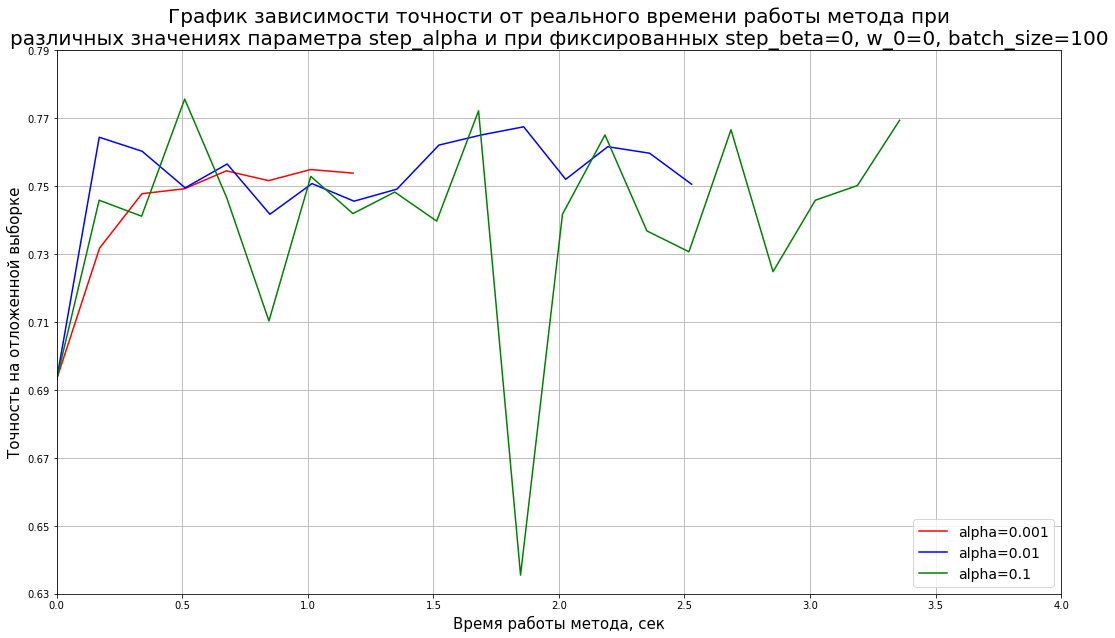

In [33]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_alpha[0]['time'])), his_alpha[0]['acc'], color='red', label='alpha=0.001')
plt.plot(np.cumsum(np.array(his_alpha[1]['time'])), his_alpha[1]['acc'], color='blue', label='alpha=0.01')
plt.plot(np.cumsum(np.array(his_alpha[2]['time'])), his_alpha[2]['acc'], color='green', label='alpha=0.1')
plt.title('График зависимости точности от реального времени работы метода при\nразличных значениях параметра step_alpha и при фиксированных step_beta=0, w_0=0, batch_size=100', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 4])
plt.xticks(np.arange(0, 4.5, 0.5))
plt.yticks(np.arange(0.63, 0.80, 0.02))
plt.ylim([0.63, 0.79])
plt.grid()
plt.legend(loc=4, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig9.pdf', format='pdf', dpi=600)

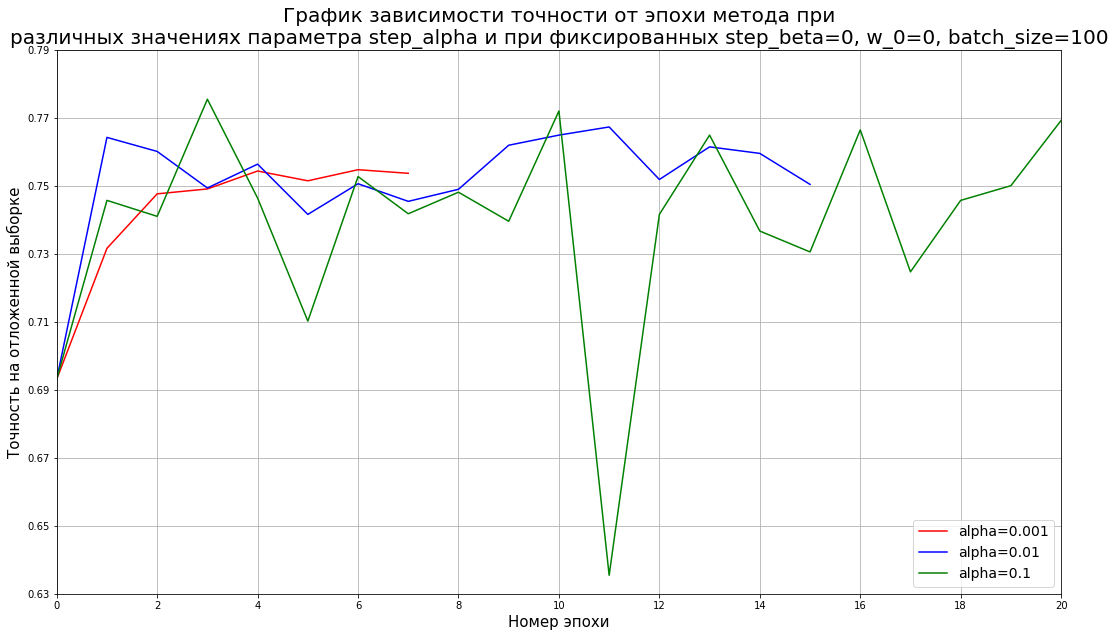

In [50]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_alpha[0]['func'])), his_alpha[0]['acc'], color='red', label='alpha=0.001')
plt.plot(np.arange(len(his_alpha[1]['func'])), his_alpha[1]['acc'], color='blue', label='alpha=0.01')
plt.plot(np.arange(len(his_alpha[2]['func'])), his_alpha[2]['acc'], color='green', label='alpha=0.1')
plt.title('График зависимости точности от эпохи метода при\nразличных значениях параметра step_alpha и при фиксированных step_beta=0, w_0=0, batch_size=100', fontsize=20)
plt.xlabel('Номер эпохи', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 20])
plt.xticks(np.arange(0, 21, 2))
plt.yticks(np.arange(0.63, 0.80, 0.02))
plt.ylim([0.63, 0.79])
plt.grid()
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [34]:
w_0 = np.zeros(X_train_fit.shape[1], dtype=np.float64)
beta = [0.0, 0.1, 0.5, 1.0, 2.0]
his_beta = []

In [35]:
for beta_value in beta:
    sgd = optimization.SGDClassifier(batch_size=100, step_alpha=0.01, step_beta=beta_value, tolerance=1e-5, max_epoch=20, l2_coef=1.0)
    his_beta.append(sgd.fit(X_train_fit, y_train_fit, w_0, trace=True, acc=(X_train_val, y_train_val)))

Warning!!! Convergence not achieved!
Warning!!! Convergence not achieved!
Warning!!! Convergence not achieved!


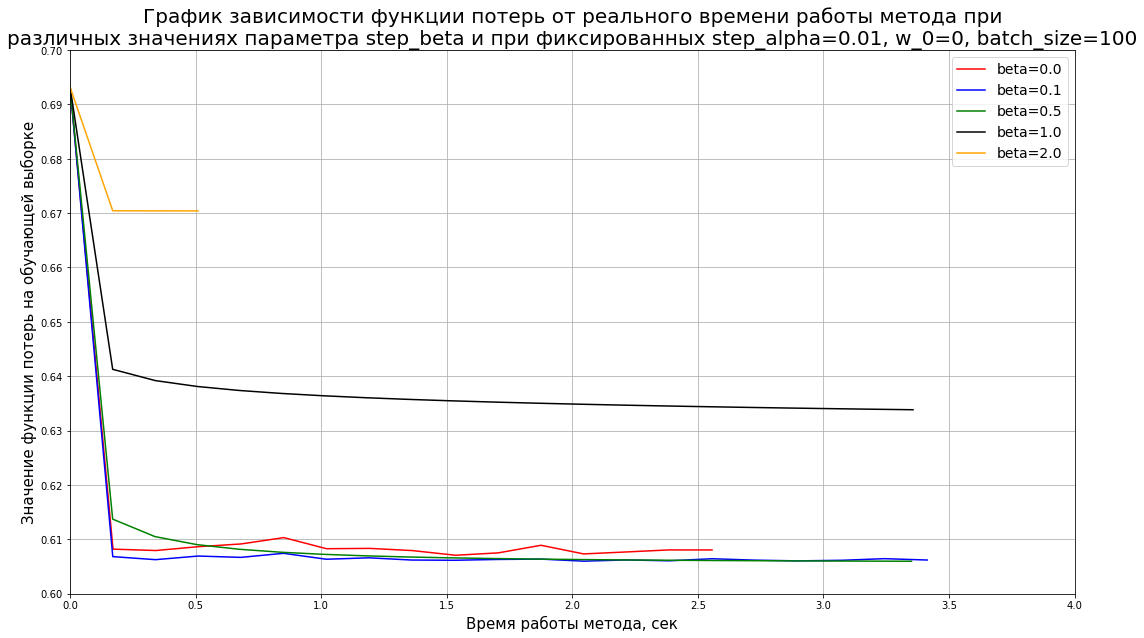

In [36]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_beta[0]['time'])), his_beta[0]['func'], color='red', label='beta=0.0')
plt.plot(np.cumsum(np.array(his_beta[1]['time'])), his_beta[1]['func'], color='blue', label='beta=0.1')
plt.plot(np.cumsum(np.array(his_beta[2]['time'])), his_beta[2]['func'], color='green', label='beta=0.5')
plt.plot(np.cumsum(np.array(his_beta[3]['time'])), his_beta[3]['func'], color='black', label='beta=1.0')
plt.plot(np.cumsum(np.array(his_beta[4]['time'])), his_beta[4]['func'], color='orange', label='beta=2.0')
plt.title('График зависимости функции потерь от реального времени работы метода при\nразличных значениях параметра step_beta и при фиксированных step_alpha=0.01, w_0=0, batch_size=100', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 4])
plt.xticks(np.arange(0, 4.5, 0.5))
plt.ylim([0.6, 0.7])
plt.yticks(np.arange(0.6, 0.71, 0.01))
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig10.pdf', format='pdf', dpi=600)

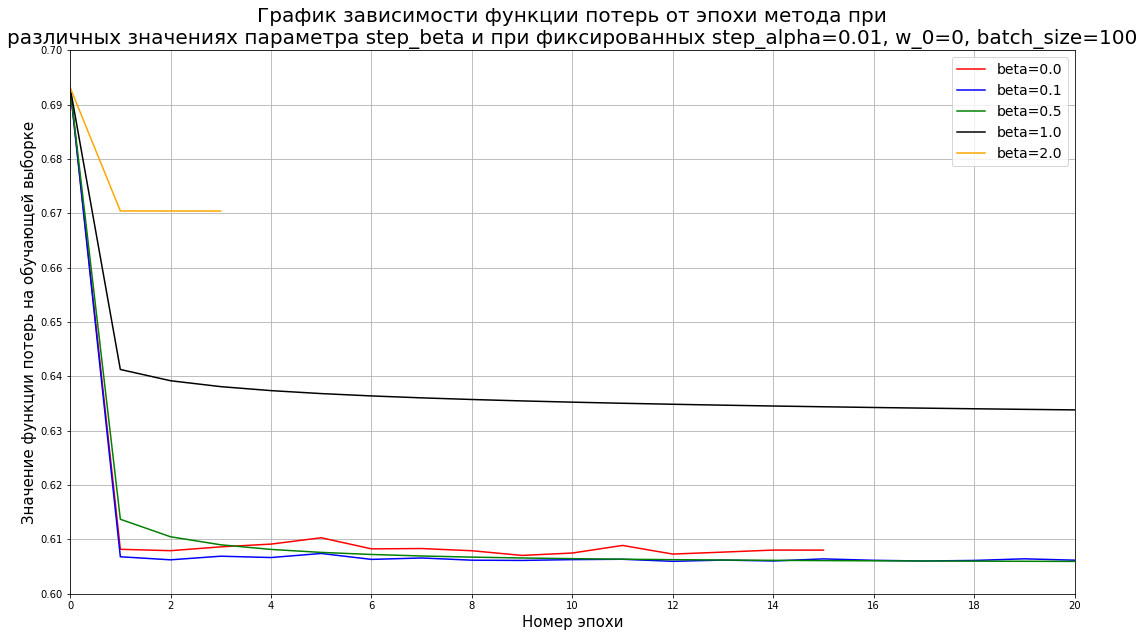

In [56]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_beta[0]['func'])), his_beta[0]['func'], color='red', label='beta=0.0')
plt.plot(np.arange(len(his_beta[1]['func'])), his_beta[1]['func'], color='blue', label='beta=0.1')
plt.plot(np.arange(len(his_beta[2]['func'])), his_beta[2]['func'], color='green', label='beta=0.5')
plt.plot(np.arange(len(his_beta[3]['func'])), his_beta[3]['func'], color='black', label='beta=1.0')
plt.plot(np.arange(len(his_beta[4]['func'])), his_beta[4]['func'], color='orange', label='beta=2.0')
plt.title('График зависимости функции потерь от эпохи метода при\nразличных значениях параметра step_beta и при фиксированных step_alpha=0.01, w_0=0, batch_size=100', fontsize=20)
plt.xlabel('Номер эпохи', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 20])
plt.xticks(np.arange(0, 21, 2))
plt.ylim([0.6, 0.7])
plt.yticks(np.arange(0.6, 0.71, 0.01))
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()

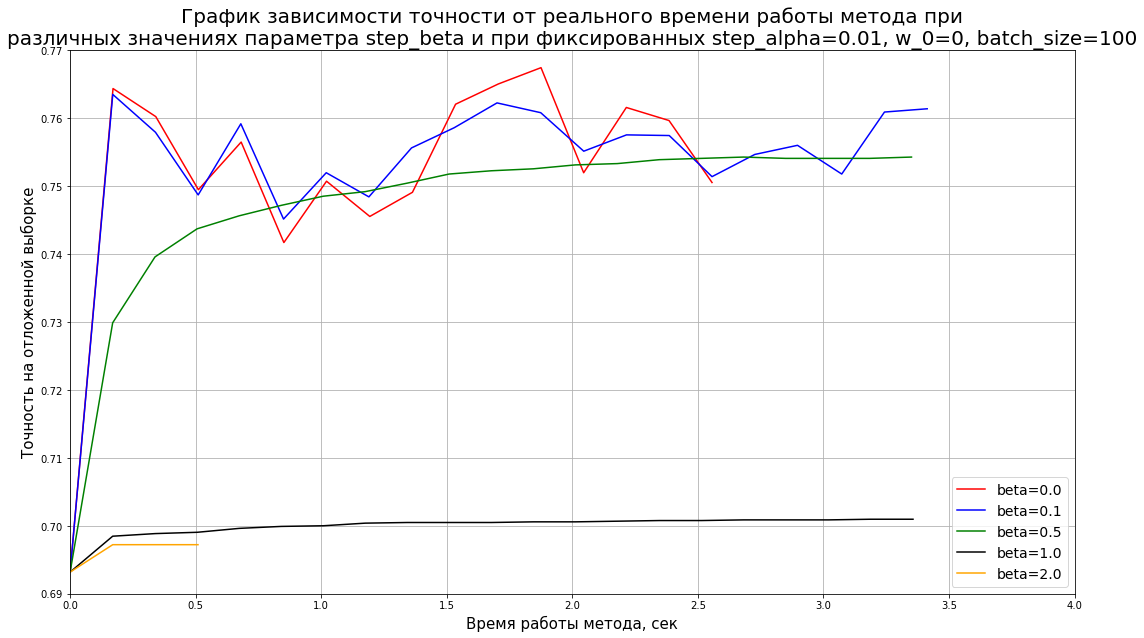

In [37]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_beta[0]['time'])), his_beta[0]['acc'], color='red', label='beta=0.0')
plt.plot(np.cumsum(np.array(his_beta[1]['time'])), his_beta[1]['acc'], color='blue', label='beta=0.1')
plt.plot(np.cumsum(np.array(his_beta[2]['time'])), his_beta[2]['acc'], color='green', label='beta=0.5')
plt.plot(np.cumsum(np.array(his_beta[3]['time'])), his_beta[3]['acc'], color='black', label='beta=1.0')
plt.plot(np.cumsum(np.array(his_beta[4]['time'])), his_beta[4]['acc'], color='orange', label='beta=2.0')
plt.title('График зависимости точности от реального времени работы метода при\nразличных значениях параметра step_beta и при фиксированных step_alpha=0.01, w_0=0, batch_size=100', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 4])
plt.xticks(np.arange(0, 4.5, 0.5))
plt.ylim([0.69, 0.77])
plt.yticks(np.arange(0.69, 0.77, 0.01))
plt.grid()
plt.legend(loc=4, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig11.pdf', format='pdf', dpi=600)

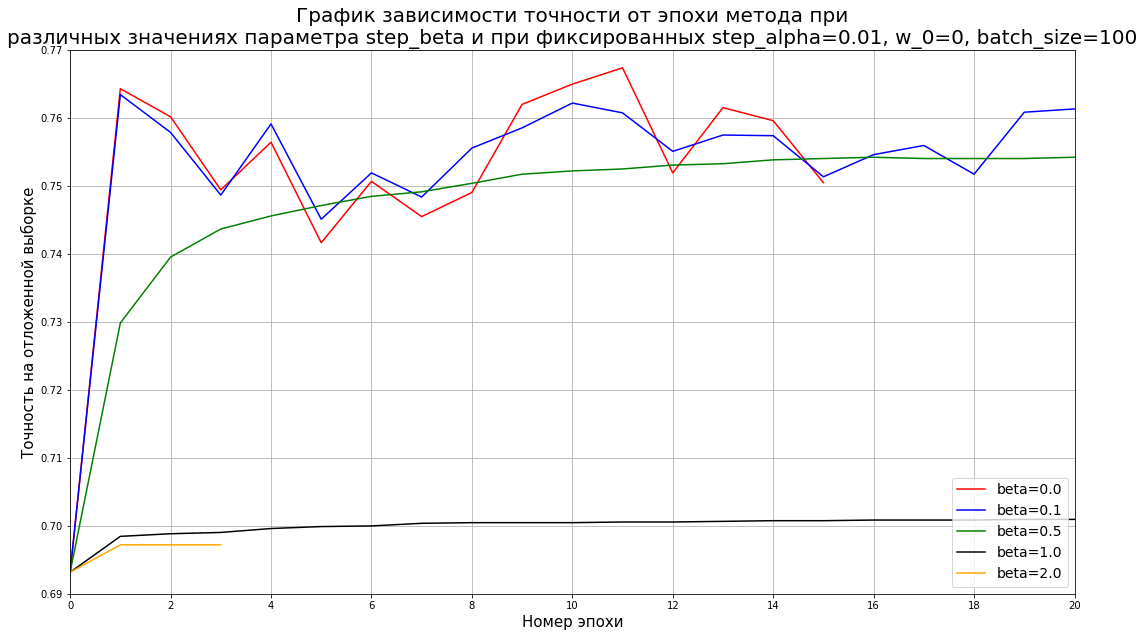

In [63]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_beta[0]['func'])), his_beta[0]['acc'], color='red', label='beta=0.0')
plt.plot(np.arange(len(his_beta[1]['func'])), his_beta[1]['acc'], color='blue', label='beta=0.1')
plt.plot(np.arange(len(his_beta[2]['func'])), his_beta[2]['acc'], color='green', label='beta=0.5')
plt.plot(np.arange(len(his_beta[3]['func'])), his_beta[3]['acc'], color='black', label='beta=1.0')
plt.plot(np.arange(len(his_beta[4]['func'])), his_beta[4]['acc'], color='orange', label='beta=2.0')
plt.title('График зависимости точности от эпохи метода при\nразличных значениях параметра step_beta и при фиксированных step_alpha=0.01, w_0=0, batch_size=100', fontsize=20)
plt.xlabel('Номер эпохи', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 20])
plt.xticks(np.arange(0, 21, 2))
plt.ylim([0.69, 0.77])
plt.yticks(np.arange(0.69, 0.77, 0.01))
plt.grid()
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [38]:
w_0 = np.zeros(X_train_fit.shape[1], dtype=np.float64)
batch_size = [10, 100, 1000]
his_bs = []

In [39]:
for bs_value in batch_size:
    sgd = optimization.SGDClassifier(batch_size=bs_value, step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_epoch=20, l2_coef=1.0)
    his_bs.append(sgd.fit(X_train_fit, y_train_fit, w_0, trace=True, acc=(X_train_val, y_train_val)))

Warning!!! Convergence not achieved!
Warning!!! Convergence not achieved!


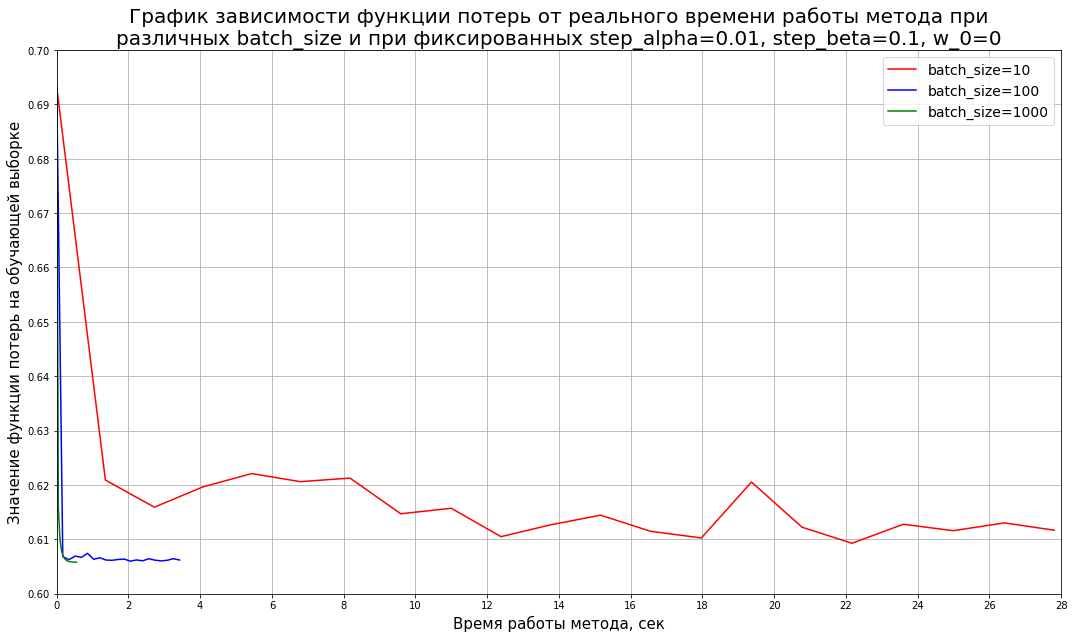

In [40]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_bs[0]['time'])), his_bs[0]['func'], color='red', label='batch_size=10')
plt.plot(np.cumsum(np.array(his_bs[1]['time'])), his_bs[1]['func'], color='blue', label='batch_size=100')
plt.plot(np.cumsum(np.array(his_bs[2]['time'])), his_bs[2]['func'], color='green', label='batch_size=1000')
plt.title('График зависимости функции потерь от реального времени работы метода при\nразличных batch_size и при фиксированных step_alpha=0.01, step_beta=0.1, w_0=0', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 28])
plt.xticks(np.arange(0, 29, 2))
plt.ylim([0.6, 0.7])
plt.yticks(np.arange(0.6, 0.71, 0.01))
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig12.pdf', format='pdf', dpi=600)

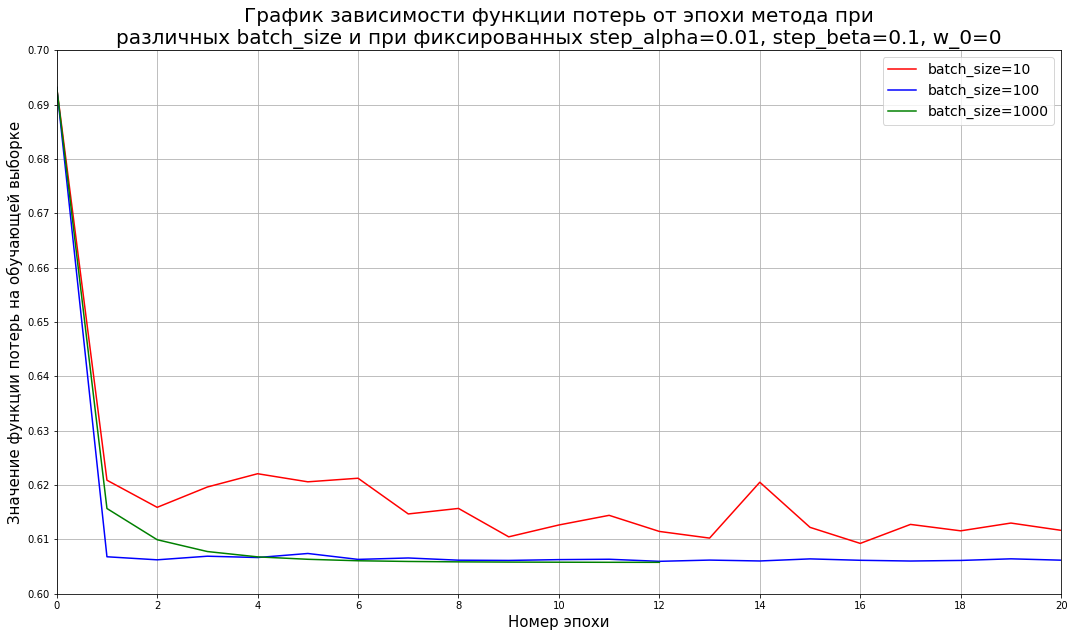

In [76]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_bs[0]['func'])), his_bs[0]['func'], color='red', label='batch_size=10')
plt.plot(np.arange(len(his_bs[1]['func'])), his_bs[1]['func'], color='blue', label='batch_size=100')
plt.plot(np.arange(len(his_bs[2]['func'])), his_bs[2]['func'], color='green', label='batch_size=1000')
plt.title('График зависимости функции потерь от эпохи метода при\nразличных batch_size и при фиксированных step_alpha=0.01, step_beta=0.1, w_0=0', fontsize=20)
plt.xlabel('Номер эпохи', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 20])
plt.xticks(np.arange(0, 21, 2))
plt.ylim([0.6, 0.7])
plt.yticks(np.arange(0.6, 0.71, 0.01))
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()

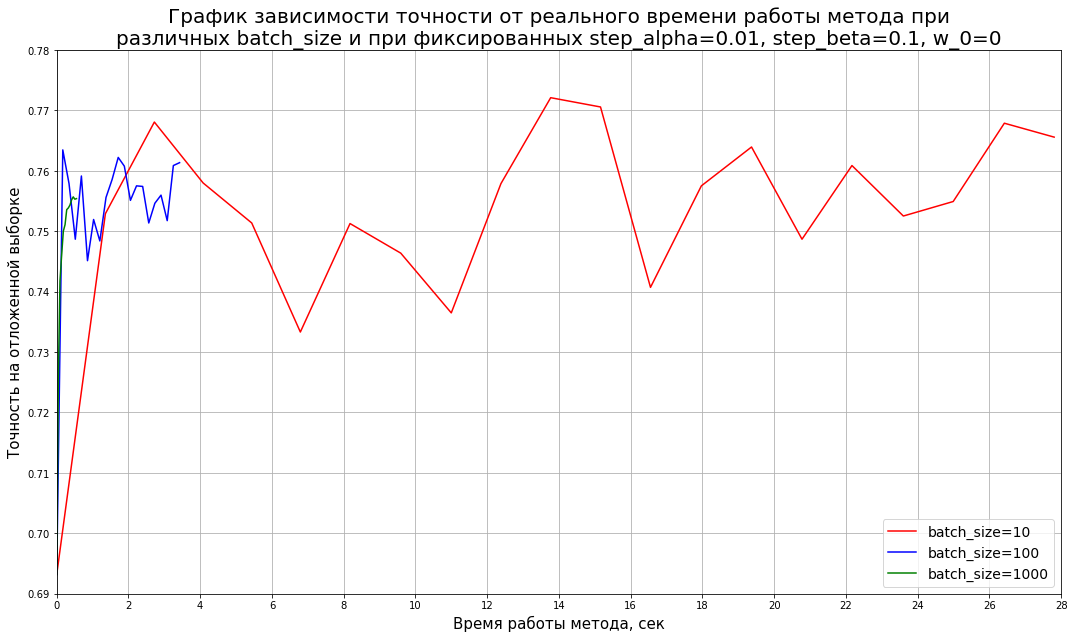

In [41]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_bs[0]['time'])), his_bs[0]['acc'], color='red', label='batch_size=10')
plt.plot(np.cumsum(np.array(his_bs[1]['time'])), his_bs[1]['acc'], color='blue', label='batch_size=100')
plt.plot(np.cumsum(np.array(his_bs[2]['time'])), his_bs[2]['acc'], color='green', label='batch_size=1000')
plt.title('График зависимости точности от реального времени работы метода при\nразличных batch_size и при фиксированных step_alpha=0.01, step_beta=0.1, w_0=0', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 28])
plt.xticks(np.arange(0, 29, 2))
plt.ylim([0.69, 0.78])
plt.yticks(np.arange(0.69, 0.78, 0.01))
plt.grid()
plt.legend(loc=4, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig13.pdf', format='pdf', dpi=600)

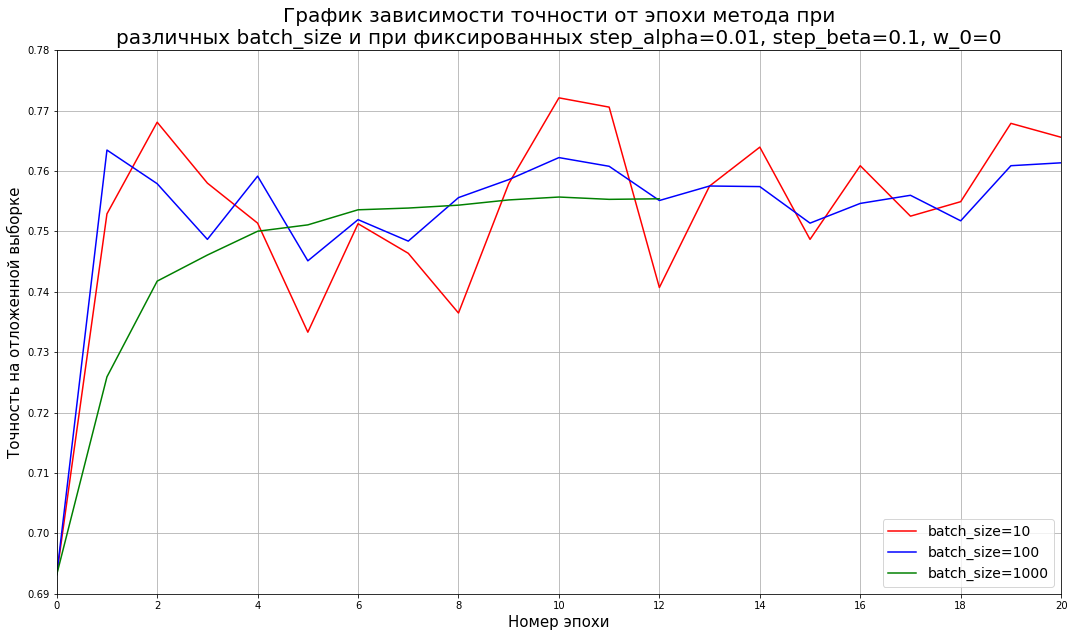

In [78]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_bs[0]['func'])), his_bs[0]['acc'], color='red', label='batch_size=10')
plt.plot(np.arange(len(his_bs[1]['func'])), his_bs[1]['acc'], color='blue', label='batch_size=100')
plt.plot(np.arange(len(his_bs[2]['func'])), his_bs[2]['acc'], color='green', label='batch_size=1000')
plt.title('График зависимости точности от эпохи метода при\nразличных batch_size и при фиксированных step_alpha=0.01, step_beta=0.1, w_0=0', fontsize=20)
plt.xlabel('Номер эпохи', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 20])
plt.xticks(np.arange(0, 21, 2))
plt.ylim([0.69, 0.78])
plt.yticks(np.arange(0.69, 0.78, 0.01))
plt.grid()
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [42]:
w_0 = [np.zeros(X_train_fit.shape[1], dtype=np.float64), np.ones(X_train_fit.shape[1], dtype=np.float64), np.random.randn(X_train_fit.shape[1]), np.random.rand(X_train_fit.shape[1])]
his_w0 = []

In [43]:
for w0_value in w_0:
    sgd = optimization.SGDClassifier(batch_size=100, step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_epoch=20, l2_coef=1.0)
    his_w0.append(sgd.fit(X_train_fit, y_train_fit, w0_value, trace=True, acc=(X_train_val, y_train_val)))

Warning!!! Convergence not achieved!
Warning!!! Convergence not achieved!
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
Warning!!! Convergence not achieved!
Warning!!! Convergence not achieved!


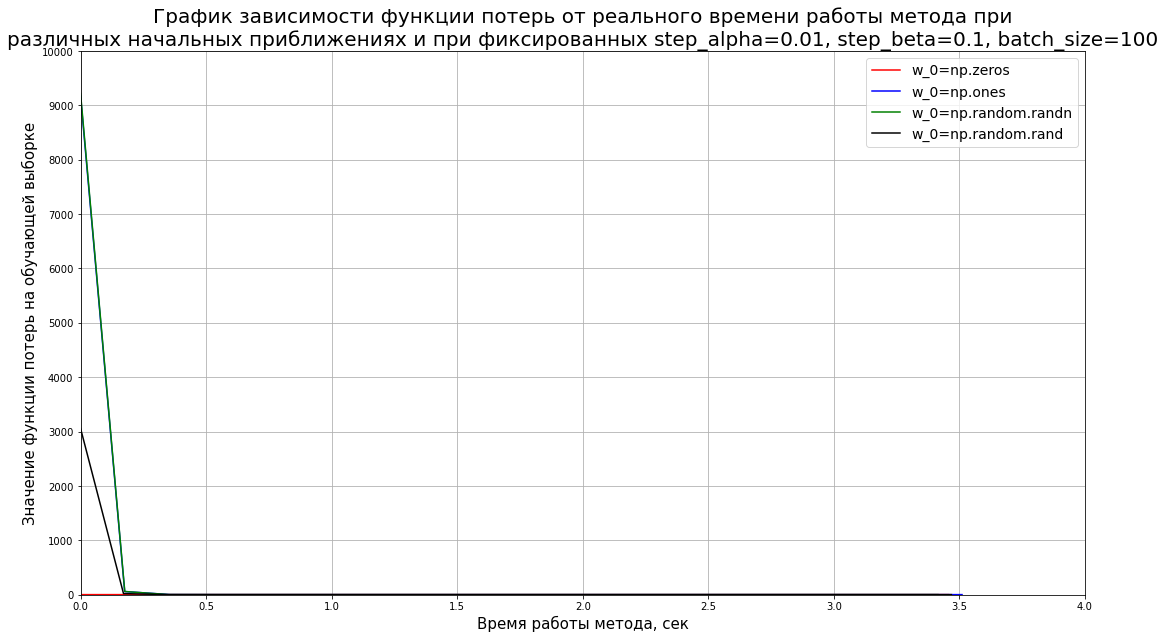

In [44]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_w0[0]['time'])), his_w0[0]['func'], color='red', label='w_0=np.zeros')
plt.plot(np.cumsum(np.array(his_w0[1]['time'])), his_w0[1]['func'], color='blue', label='w_0=np.ones')
plt.plot(np.cumsum(np.array(his_w0[2]['time'])), his_w0[2]['func'], color='green', label='w_0=np.random.randn')
plt.plot(np.cumsum(np.array(his_w0[3]['time'])), his_w0[3]['func'], color='black', label='w_0=np.random.rand')
plt.title('График зависимости функции потерь от реального времени работы метода при\nразличных начальных приближениях и при фиксированных step_alpha=0.01, step_beta=0.1, batch_size=100', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 4])
plt.xticks(np.arange(0, 4.5, 0.5))
plt.ylim([0, 10000])
plt.yticks(np.arange(0, 10001, 1000))
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig14.pdf', format='pdf', dpi=600)

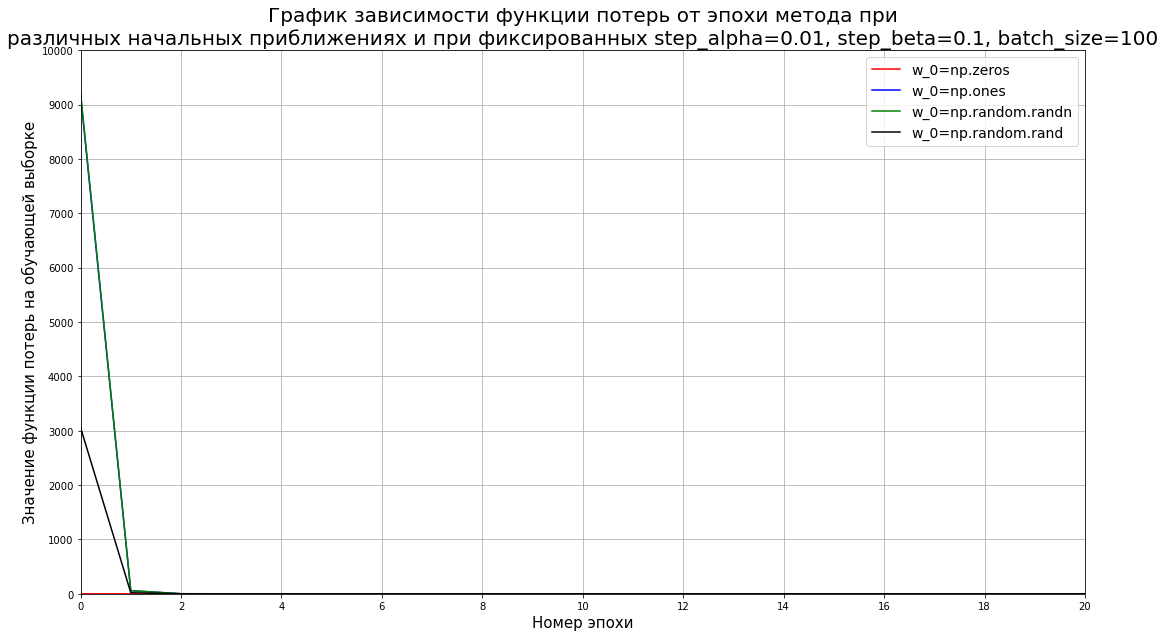

In [45]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_w0[0]['func'])), his_w0[0]['func'], color='red', label='w_0=np.zeros')
plt.plot(np.arange(len(his_w0[1]['func'])), his_w0[1]['func'], color='blue', label='w_0=np.ones')
plt.plot(np.arange(len(his_w0[2]['func'])), his_w0[2]['func'], color='green', label='w_0=np.random.randn')
plt.plot(np.arange(len(his_w0[3]['func'])), his_w0[3]['func'], color='black', label='w_0=np.random.rand')
plt.title('График зависимости функции потерь от эпохи метода при\nразличных начальных приближениях и при фиксированных step_alpha=0.01, step_beta=0.1, batch_size=100', fontsize=20)
plt.xlabel('Номер эпохи', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 20])
plt.xticks(np.arange(0, 21, 2))
plt.ylim([0, 10000])
plt.yticks(np.arange(0, 10001, 1000))
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()

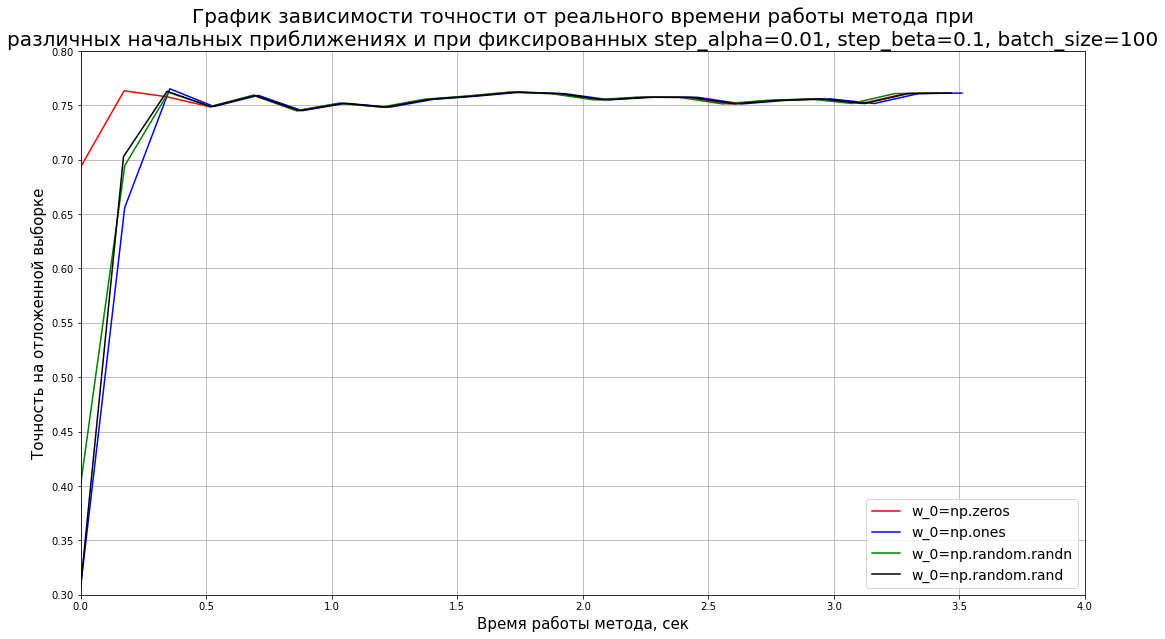

In [46]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_w0[0]['time'])), his_w0[0]['acc'], color='red', label='w_0=np.zeros')
plt.plot(np.cumsum(np.array(his_w0[1]['time'])), his_w0[1]['acc'], color='blue', label='w_0=np.ones')
plt.plot(np.cumsum(np.array(his_w0[2]['time'])), his_w0[2]['acc'], color='green', label='w_0=np.random.randn')
plt.plot(np.cumsum(np.array(his_w0[3]['time'])), his_w0[3]['acc'], color='black', label='w_0=np.random.rand')
plt.title('График зависимости точности от реального времени работы метода при\nразличных начальных приближениях и при фиксированных step_alpha=0.01, step_beta=0.1, batch_size=100', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 4])
plt.xticks(np.arange(0, 4.5, 0.5))
plt.ylim([0.3, 0.8])
plt.yticks(np.arange(0.3, 0.85, 0.05))
plt.grid()
plt.legend(loc=4, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig15.pdf', format='pdf', dpi=600)

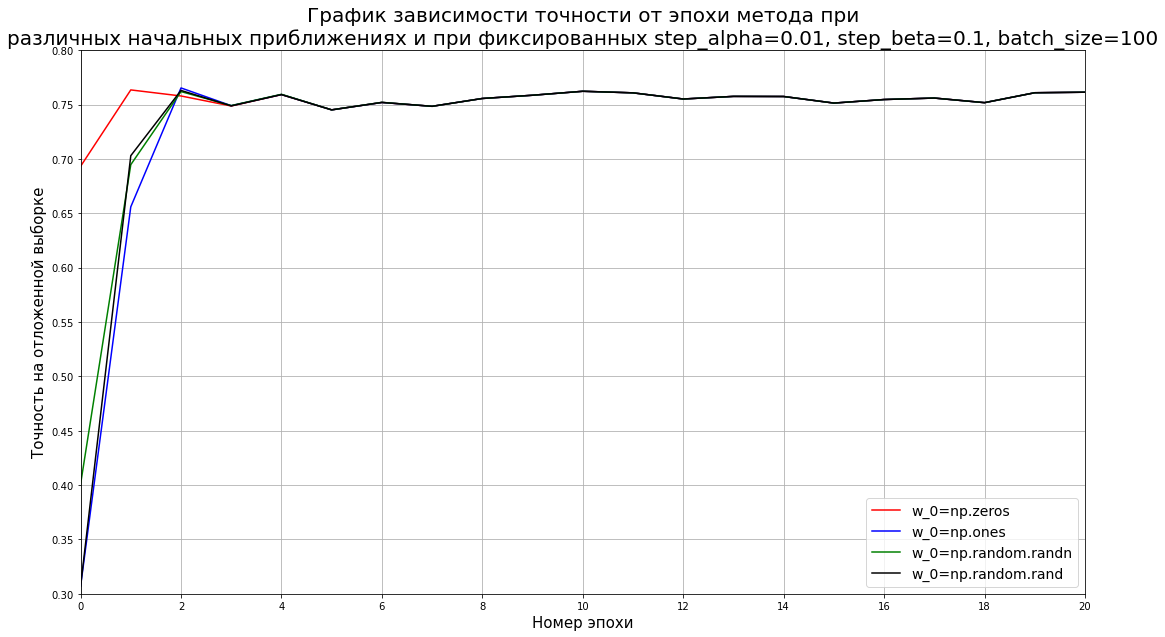

In [47]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.arange(len(his_w0[0]['func'])), his_w0[0]['acc'], color='red', label='w_0=np.zeros')
plt.plot(np.arange(len(his_w0[1]['func'])), his_w0[1]['acc'], color='blue', label='w_0=np.ones')
plt.plot(np.arange(len(his_w0[2]['func'])), his_w0[2]['acc'], color='green', label='w_0=np.random.randn')
plt.plot(np.arange(len(his_w0[3]['func'])), his_w0[3]['acc'], color='black', label='w_0=np.random.rand')
plt.title('График зависимости точности от эпохи метода при\nразличных начальных приближениях и при фиксированных step_alpha=0.01, step_beta=0.1, batch_size=100', fontsize=20)
plt.xlabel('Номер эпохи', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.ylim([0.3, 0.8])
plt.yticks(np.arange(0.3, 0.85, 0.05))
plt.xlim([0, 20])
plt.xticks(np.arange(0, 21, 2))
plt.grid()
plt.legend(loc=4, prop={'size': 14})
plt.show()

### Задание 5

In [48]:
w_0 = np.zeros(X_train_fit.shape[1], dtype=np.float64)
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=1000, l2_coef=1.0)
sgd = optimization.SGDClassifier(batch_size=100, step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_epoch=25, l2_coef=1.0)

In [49]:
%%time

his_gd = gd.fit(X_train_fit, y_train_fit, w_0, trace=True, acc=(X_train_val, y_train_val))

Wall time: 5.71 s


In [50]:
%%time

his_sgd = sgd.fit(X_train_fit, y_train_fit, w_0, trace=True, acc=(X_train_val, y_train_val))

Wall time: 3.65 s


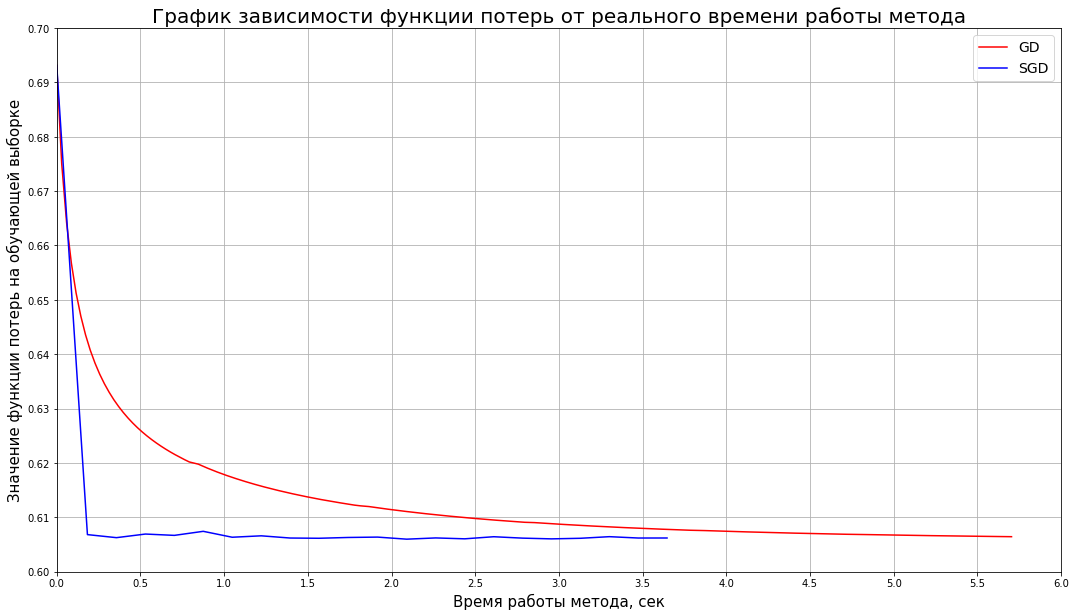

In [51]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_gd['time'])), his_gd['func'], color='red', label='GD')
plt.plot(np.cumsum(np.array(his_sgd['time'])), his_sgd['func'], color='blue', label='SGD')
plt.title('График зависимости функции потерь от реального времени работы метода', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Значение функции потерь на обучающей выборке', fontsize=15)
plt.xlim([0, 6])
plt.xticks(np.arange(0, 6.5, 0.5))
plt.ylim([0.6, 0.7])
plt.yticks(np.arange(0.6, 0.71, 0.01))
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig16.pdf', format='pdf', dpi=600)

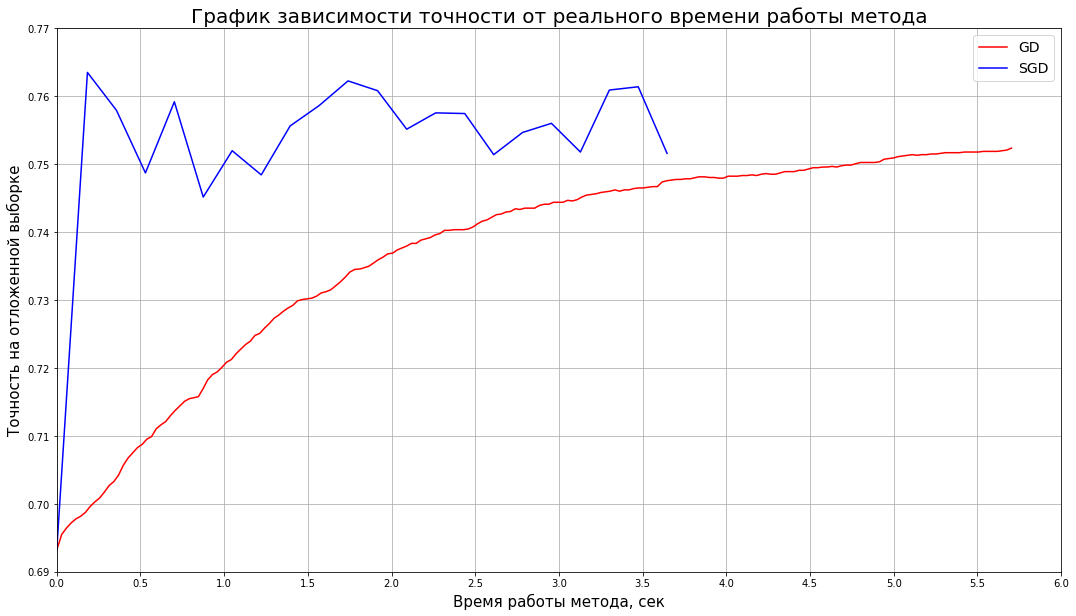

In [52]:
fig = plt.figure(figsize=(18, 10))
plt.plot(np.cumsum(np.array(his_gd['time'])), his_gd['acc'], color='red', label='GD')
plt.plot(np.cumsum(np.array(his_sgd['time'])), his_sgd['acc'], color='blue', label='SGD')
plt.title('График зависимости точности от реального времени работы метода', fontsize=20)
plt.xlabel('Время работы метода, сек', fontsize=15)
plt.ylabel('Точность на отложенной выборке', fontsize=15)
plt.xlim([0, 6])
plt.xticks(np.arange(0, 6.5, 0.5))
plt.ylim([0.69, 0.77])
plt.yticks(np.arange(0.69, 0.77, 0.01))
plt.grid()
plt.legend(loc=1, prop={'size': 14})
plt.show()
fig.savefig('prac_task2_pics/fig17.pdf', format='pdf', dpi=600)

### Задание 6

In [51]:
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=10000, l2_coef=1.0)
sgd = optimization.SGDClassifier(batch_size=100, step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_epoch=100, l2_coef=1.0)

In [52]:
%%time

gd.fit(X_train, y_train)

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

Wall time: 51.7 s


In [53]:
%%time

sgd.fit(X_train, y_train)

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)


Wall time: 14.5 s


In [54]:
res_gd = gd.predict(X_test)

In [55]:
res_sgd = sgd.predict(X_test)

In [56]:
np.sum(res_gd == y_test) / y_test.shape[0]

0.7390694525053202

In [57]:
np.sum(res_sgd == y_test) / y_test.shape[0]

0.7371348423292706

In [68]:
gd.fit(X_train_fit, y_train_fit)

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

In [69]:
(gd.predict(X_train_val) == y_train_val).sum() / y_train_val.shape[0]

0.7549217324498223

In [70]:
prob = gd.predict_proba(X_train_val)[:, 1]

In [71]:
prob

array([0.21446971, 0.35386911, 0.48528837, ..., 0.33219036, 0.48000001,
       0.37074255])

In [72]:
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)

In [73]:
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

print(threshold)
# >= threshold => positive class

0.48041131076565835


In [74]:
prob_bin = (prob >= threshold).astype(int)

In [75]:
prob_bin

array([0, 0, 1, ..., 0, 0, 0])

In [76]:
(prob_bin == y_train_val).sum() / y_train_val.shape[0]

0.7898780370690484

In [77]:
gd.fit(X_train, y_train)
res = (gd.predict_proba(X_test)[:, 1] >= threshold).astype(int)

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

In [78]:
np.sum(res == y_test) / y_test.shape[0]

0.7707486941381312

После бинаризации вероятностей, точность на тестовой выборке сильно улучшилась.

In [16]:
data_train

,comment_text,is_toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i m s...,0
2,hey man i m really not trying to edit war it...,0
3,more i can t make any real suggestions on im...,0
4,you sir are my hero any chance you remember...,0
...,...,...
159494,our previous conversation you fucking sh...,1
159514,you are a mischievious pubic hair,1
159541,your absurd edits your absurd edits on great...,1
159546,hey listen don t you ever delete my edi...,1


In [21]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ, 'N': wordnet.NOUN, 'V': wordnet.VERB, 'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [23]:
lemmatizer = WordNetLemmatizer()

In [32]:
data_train.comment_text = np.array(list(map(lambda z: ' '.join(list(map(lambda z2: lemmatizer.lemmatize(z2, get_wordnet_pos(z2)), z.split()))), data_train.comment_text)))
data_test.comment_text = np.array(list(map(lambda z: ' '.join(list(map(lambda z2: lemmatizer.lemmatize(z2, get_wordnet_pos(z2)), z.split()))), data_test.comment_text)))

In [34]:
bow = CountVectorizer(max_df=1.0, min_df=5, stop_words=stopwords.words('english'), dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())

In [35]:
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [36]:
X_train.shape

(52061, 14559)

In [37]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)

In [38]:
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=10000, l2_coef=1.0)
sgd = optimization.SGDClassifier(batch_size=100, step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_epoch=100, l2_coef=1.0)

In [39]:
%%time

gd.fit(X_train, y_train)

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

Wall time: 34.1 s


In [40]:
%%time

sgd.fit(X_train, y_train)

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)


Wall time: 1.95 s


In [41]:
res_gd = gd.predict(X_test)
res_sgd = sgd.predict(X_test)

In [42]:
np.sum(res_gd == y_test) / y_test.shape[0]

0.711839814277423

In [43]:
np.sum(res_sgd == y_test) / y_test.shape[0]

0.7115496227510156

In [44]:
gd.fit(X_train_fit, y_train_fit)

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

In [45]:
(gd.predict(X_train_val) == y_train_val).sum() / y_train_val.shape[0]

0.7064246614808413

In [46]:
prob = gd.predict_proba(X_train_val)[:, 1]
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

print(threshold)
# >= threshold => positive class

0.47005021963454685


In [47]:
prob_bin = (prob >= threshold).astype(int)
(prob_bin == y_train_val).sum() / y_train_val.shape[0]

0.8036108710266013

In [48]:
gd.fit(X_train, y_train)
res = (gd.predict_proba(X_test)[:, 1] >= threshold).astype(int)

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

In [49]:
np.sum(res == y_test) / y_test.shape[0]

0.8063455213774424

Такая предобработка текста (лемматизация и удаление стоп слов) сильно уменьшила признаковое пространство, модели стали обучаться намного быстрее, точность на тестовой выборке увеличилась.

### Задание 7

In [51]:
data_train

,comment_text,is_toxic
0,explanation why the edits make under my userna...,0
1,d aww he match this background colour i m seem...,0
2,hey man i m really not try to edit war it s ju...,0
3,more i can t make any real suggestion on impro...,0
4,you sir be my hero any chance you remember wha...,0
...,...,...
159494,our previous conversation you fuck shit eat li...,1
159514,you be a mischievious pubic hair,1
159541,your absurd edits your absurd edits on great w...,1
159546,hey listen don t you ever delete my edits ever...,1


In [52]:
bow = CountVectorizer(max_df=1.0, min_df=4, stop_words=stopwords.words('english'), dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [53]:
X_train.shape

(52061, 17052)

In [54]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=10000, l2_coef=1.0)
gd.fit(X_train_fit, y_train_fit)
prob = gd.predict_proba(X_train_val)[:, 1]
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

gd.fit(X_train, y_train)
res = (gd.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(np.sum(res == y_test) / y_test.shape[0])

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

0.8071193654478622


In [55]:
bow = CountVectorizer(max_df=1.0, min_df=3, stop_words=stopwords.words('english'), dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [56]:
X_train.shape

(52061, 21366)

In [57]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=10000, l2_coef=1.0)
gd.fit(X_train_fit, y_train_fit)
prob = gd.predict_proba(X_train_val)[:, 1]
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

gd.fit(X_train, y_train)
res = (gd.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(np.sum(res == y_test) / y_test.shape[0])

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

0.8055233120526214


In [58]:
bow = CountVectorizer(max_df=1.0, min_df=6, stop_words=stopwords.words('english'), dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [59]:
X_train.shape

(52061, 12853)

In [60]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=10000, l2_coef=1.0)
gd.fit(X_train_fit, y_train_fit)
prob = gd.predict_proba(X_train_val)[:, 1]
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

gd.fit(X_train, y_train)
res = (gd.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(np.sum(res == y_test) / y_test.shape[0])

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

0.8191139485393694


In [61]:
bow = CountVectorizer(max_df=1.0, min_df=7, stop_words=stopwords.words('english'), dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [62]:
X_train.shape

(52061, 11577)

In [63]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=10000, l2_coef=1.0)
gd.fit(X_train_fit, y_train_fit)
prob = gd.predict_proba(X_train_val)[:, 1]
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

gd.fit(X_train, y_train)
res = (gd.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(np.sum(res == y_test) / y_test.shape[0])

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

0.818243373960147


In [64]:
bow = CountVectorizer(max_df=1.0, min_df=8, stop_words=stopwords.words('english'), dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [65]:
X_train.shape

(52061, 10541)

In [66]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=10000, l2_coef=1.0)
gd.fit(X_train_fit, y_train_fit)
prob = gd.predict_proba(X_train_val)[:, 1]
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

gd.fit(X_train, y_train)
res = (gd.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(np.sum(res == y_test) / y_test.shape[0])

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

0.8197426968465854


In [67]:
bow = CountVectorizer(max_df=1.0, min_df=9, stop_words=stopwords.words('english'), dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [68]:
X_train.shape

(52061, 9745)

In [69]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=10000, l2_coef=1.0)
gd.fit(X_train_fit, y_train_fit)
prob = gd.predict_proba(X_train_val)[:, 1]
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

gd.fit(X_train, y_train)
res = (gd.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(np.sum(res == y_test) / y_test.shape[0])

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

0.8185819307409556


In [104]:
bow = CountVectorizer(max_df=0.1, min_df=6, stop_words=stopwords.words('english'), dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [105]:
X_train.shape

(52061, 12837)

In [106]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=10000, l2_coef=1.0)
gd.fit(X_train_fit, y_train_fit)
prob = gd.predict_proba(X_train_val)[:, 1]
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

gd.fit(X_train, y_train)
res = (gd.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(np.sum(res == y_test) / y_test.shape[0])

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)


0.8289320951828206


In [107]:
tf_idf = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
bow = CountVectorizer(max_df=0.1, min_df=6, stop_words=stopwords.words('english'), dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [108]:
X_train.shape

(52061, 12837)

In [110]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=10000, l2_coef=1.0)
gd.fit(X_train_fit, y_train_fit)
prob = gd.predict_proba(X_train_val)[:, 1]
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

gd.fit(X_train, y_train)
res = (gd.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(np.sum(res == y_test) / y_test.shape[0])

0.8106016637647514


In [114]:
tf_idf = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)
bow = CountVectorizer(max_df=0.1, min_df=5, stop_words=stopwords.words('english'), dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [115]:
X_train.shape

(52061, 14543)

In [116]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)
gd = optimization.GDClassifier(step_alpha=0.01, step_beta=0.1, tolerance=1e-5, max_iter=10000, l2_coef=1.0)
gd.fit(X_train_fit, y_train_fit)
prob = gd.predict_proba(X_train_val)[:, 1]
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

gd.fit(X_train, y_train)
res = (gd.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(np.sum(res == y_test) / y_test.shape[0])

0.7997194815244728


С Tf-idf точность ниже, чем с BOW.

### Задание 8

In [126]:
bow = CountVectorizer(max_df=0.1, min_df=6, stop_words=stopwords.words('english'), dtype=np.float64)
X_train = bow.fit_transform(data_train.comment_text.to_numpy())
X_test = bow.transform(data_test.comment_text.to_numpy())
X_train = sparse.csr_matrix(np.hstack((X_train.toarray(), np.ones(X_train.shape[0], dtype=np.float64)[:, np.newaxis])))
X_test = sparse.csr_matrix(np.hstack((X_test.toarray(), np.ones(X_test.shape[0], dtype=np.float64)[:, np.newaxis])))

In [147]:
X_train_fit, X_train_val, y_train_fit, y_train_val = train_test_split(X_train.toarray(), y_train, test_size=0.2, random_state=1080)
X_train_fit = sparse.csr_matrix(X_train_fit)
X_train_val = sparse.csr_matrix(X_train_val)
sgd = optimization.SGDClassifier(batch_size=100, step_alpha=0.1, step_beta=0.1, tolerance=1e-5, max_epoch=1000, l2_coef=0.001)
sgd.fit(X_train_fit, y_train_fit)
prob = sgd.predict_proba(X_train_val)[:, 1]
y_train_val_sorted = y_train_val[np.argsort(prob)]
prob_sorted = np.sort(prob)
max_acc = -1
for i in range(y_train_val.shape[0]):
    true = np.sum(y_train_val_sorted[0:i] == 0) + np.sum(y_train_val_sorted[i:] == 1)
    if true / y_train_val.shape[0] > max_acc:
        max_acc = true / y_train_val.shape[0]
        threshold = prob_sorted[i]

sgd.fit(X_train, y_train)
res = (sgd.predict_proba(X_test)[:, 1] >= threshold).astype(int)
print(np.sum(res == y_test) / y_test.shape[0])

C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.clip(np.exp((X @ w) * y), 1e-12, 1e+12)
C:\Python\prac_task2\oracles.py:49: RuntimeWarning: overflow encountered in exp
  ex = np.

0.8815534919713678


In [150]:
data_test[res != y_test]

,comment_text,is_toxic
1,dear god this site be horrible,0
17,balance this page have one sentence about the ...,0
27,i will burn you to hell if you revoke my talk ...,0
33,use of assist suicide to refer to aid in die b...,0
38,how dare you vandalize that page about the hm ...,1
...,...,...
63325,no she be a promising and well know young mode...,1
63480,please someone fix this godawful article,1
63636,yeah sure you say you welcome discussion but w...,1
63827,you might mention it be all your fault our res...,1


In [59]:
data_test.loc[27].comment_text

'i will burn you to hell if you revoke my talk page access             '